# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

### Решение

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2 * np.sin(x) - np.cos(2 * x)

def df(x):
    return 2 * np.cos(x) + 2 * np.sin(2 * x)

def beauty_derivative_plot(x_point):
    # Разбили интервал (-2pi, 2pi)
    x = np.linspace(-2 * np.pi, 2 * np.pi, 400)

    # Находим f(x) и f'(x)
    y = f(x)
    dy = df(x)

    # Находим в интервале (x_point - 1.0, x_point + 1.0) касательную к f(x) в точке x_point
    y_point = f(x_point)
    tangent_x = np.linspace(x_point - 1, x_point + 1, 50)
    tangent_y = df(x_point) * (tangent_x - x_point) + y_point

    # Рисуем график
    plt.rcParams['figure.dpi'] = 300  # Устанавливаем высокое разрешение по умолчанию
    plt.figure(figsize=(10, 10))
    plt.plot(x, y, label=r'$f(x) = 2\sin x - \cos 2x$', color='blue')
    plt.plot(x, dy, label=r"$f'(x) = 2\cos x + 2\sin 2x$", color='red', linestyle='dashed')
    plt.plot(tangent_x, tangent_y, label=f'Tangent at x = {x_point}', color='green')

    plt.plot([x_point, x_point], [0, y_point], color='purple', linestyle='dashed', linewidth=1.5) # Перпендикуляр на Ox
    plt.plot([0, x_point], [y_point, y_point], color='purple', linestyle='dashed', linewidth=1.5) # Перпендикуляр на Oy

    plt.scatter(x_point, y_point, color='black', zorder=3) # Отмечаем точку касания

    plt.annotate(
        f'f\'({x_point:.2f}) = {df(x_point):.2f}', 
        xy=(x_point, y_point), 
        xytext=(x_point - 1.0, y_point - 2.0),
        arrowprops=dict(arrowstyle="->", color='black', connectionstyle="arc3,rad=0.1"),
        color='black'
    ) # Добавляем стрелочку и подпись

    # Задаём параметры
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlim((-2 * np.pi, 2 * np.pi))
    plt.ylim((-4, 4))
    plt.xticks(np.arange(-6, 7, 2))
    plt.yticks(np.arange(-4, 5, 1))
    plt.gca().set_aspect(1) # Чтобы отношение y/x = 1
    plt.legend(loc="upper right")
    plt.title("Function, Derivative, and Tangent Line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

Пример использования:

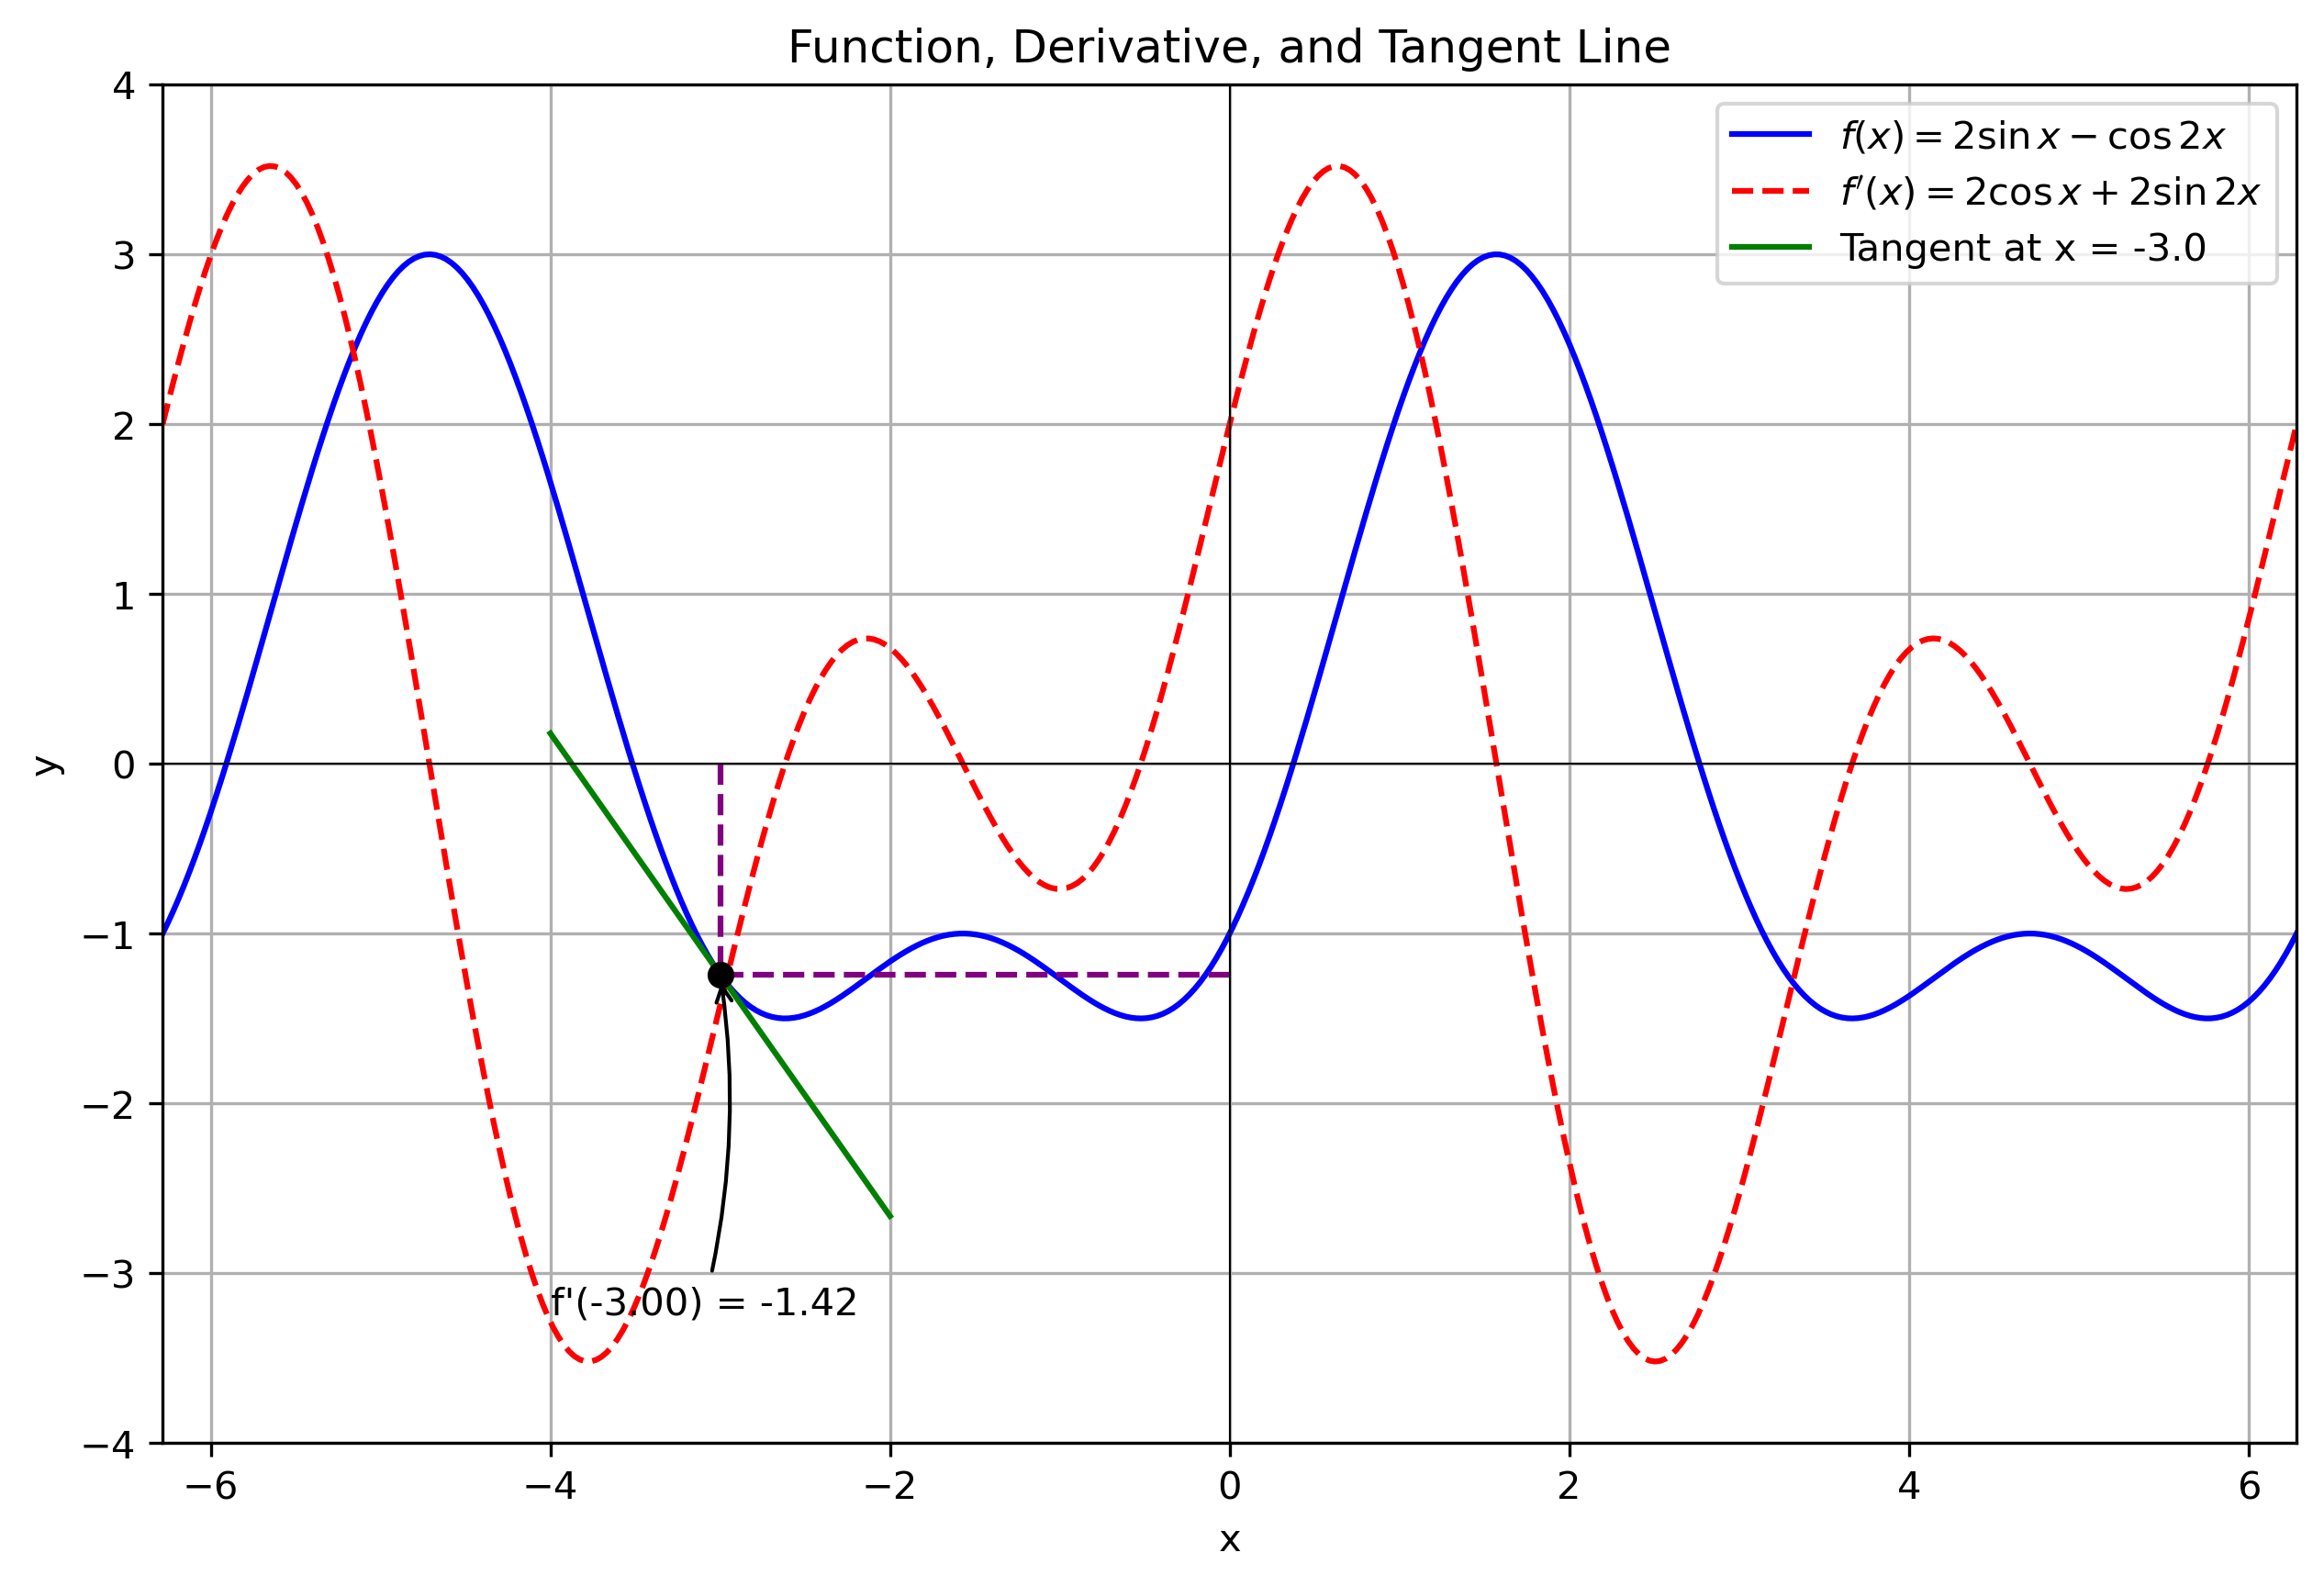

In [2]:
beauty_derivative_plot(-3.0)

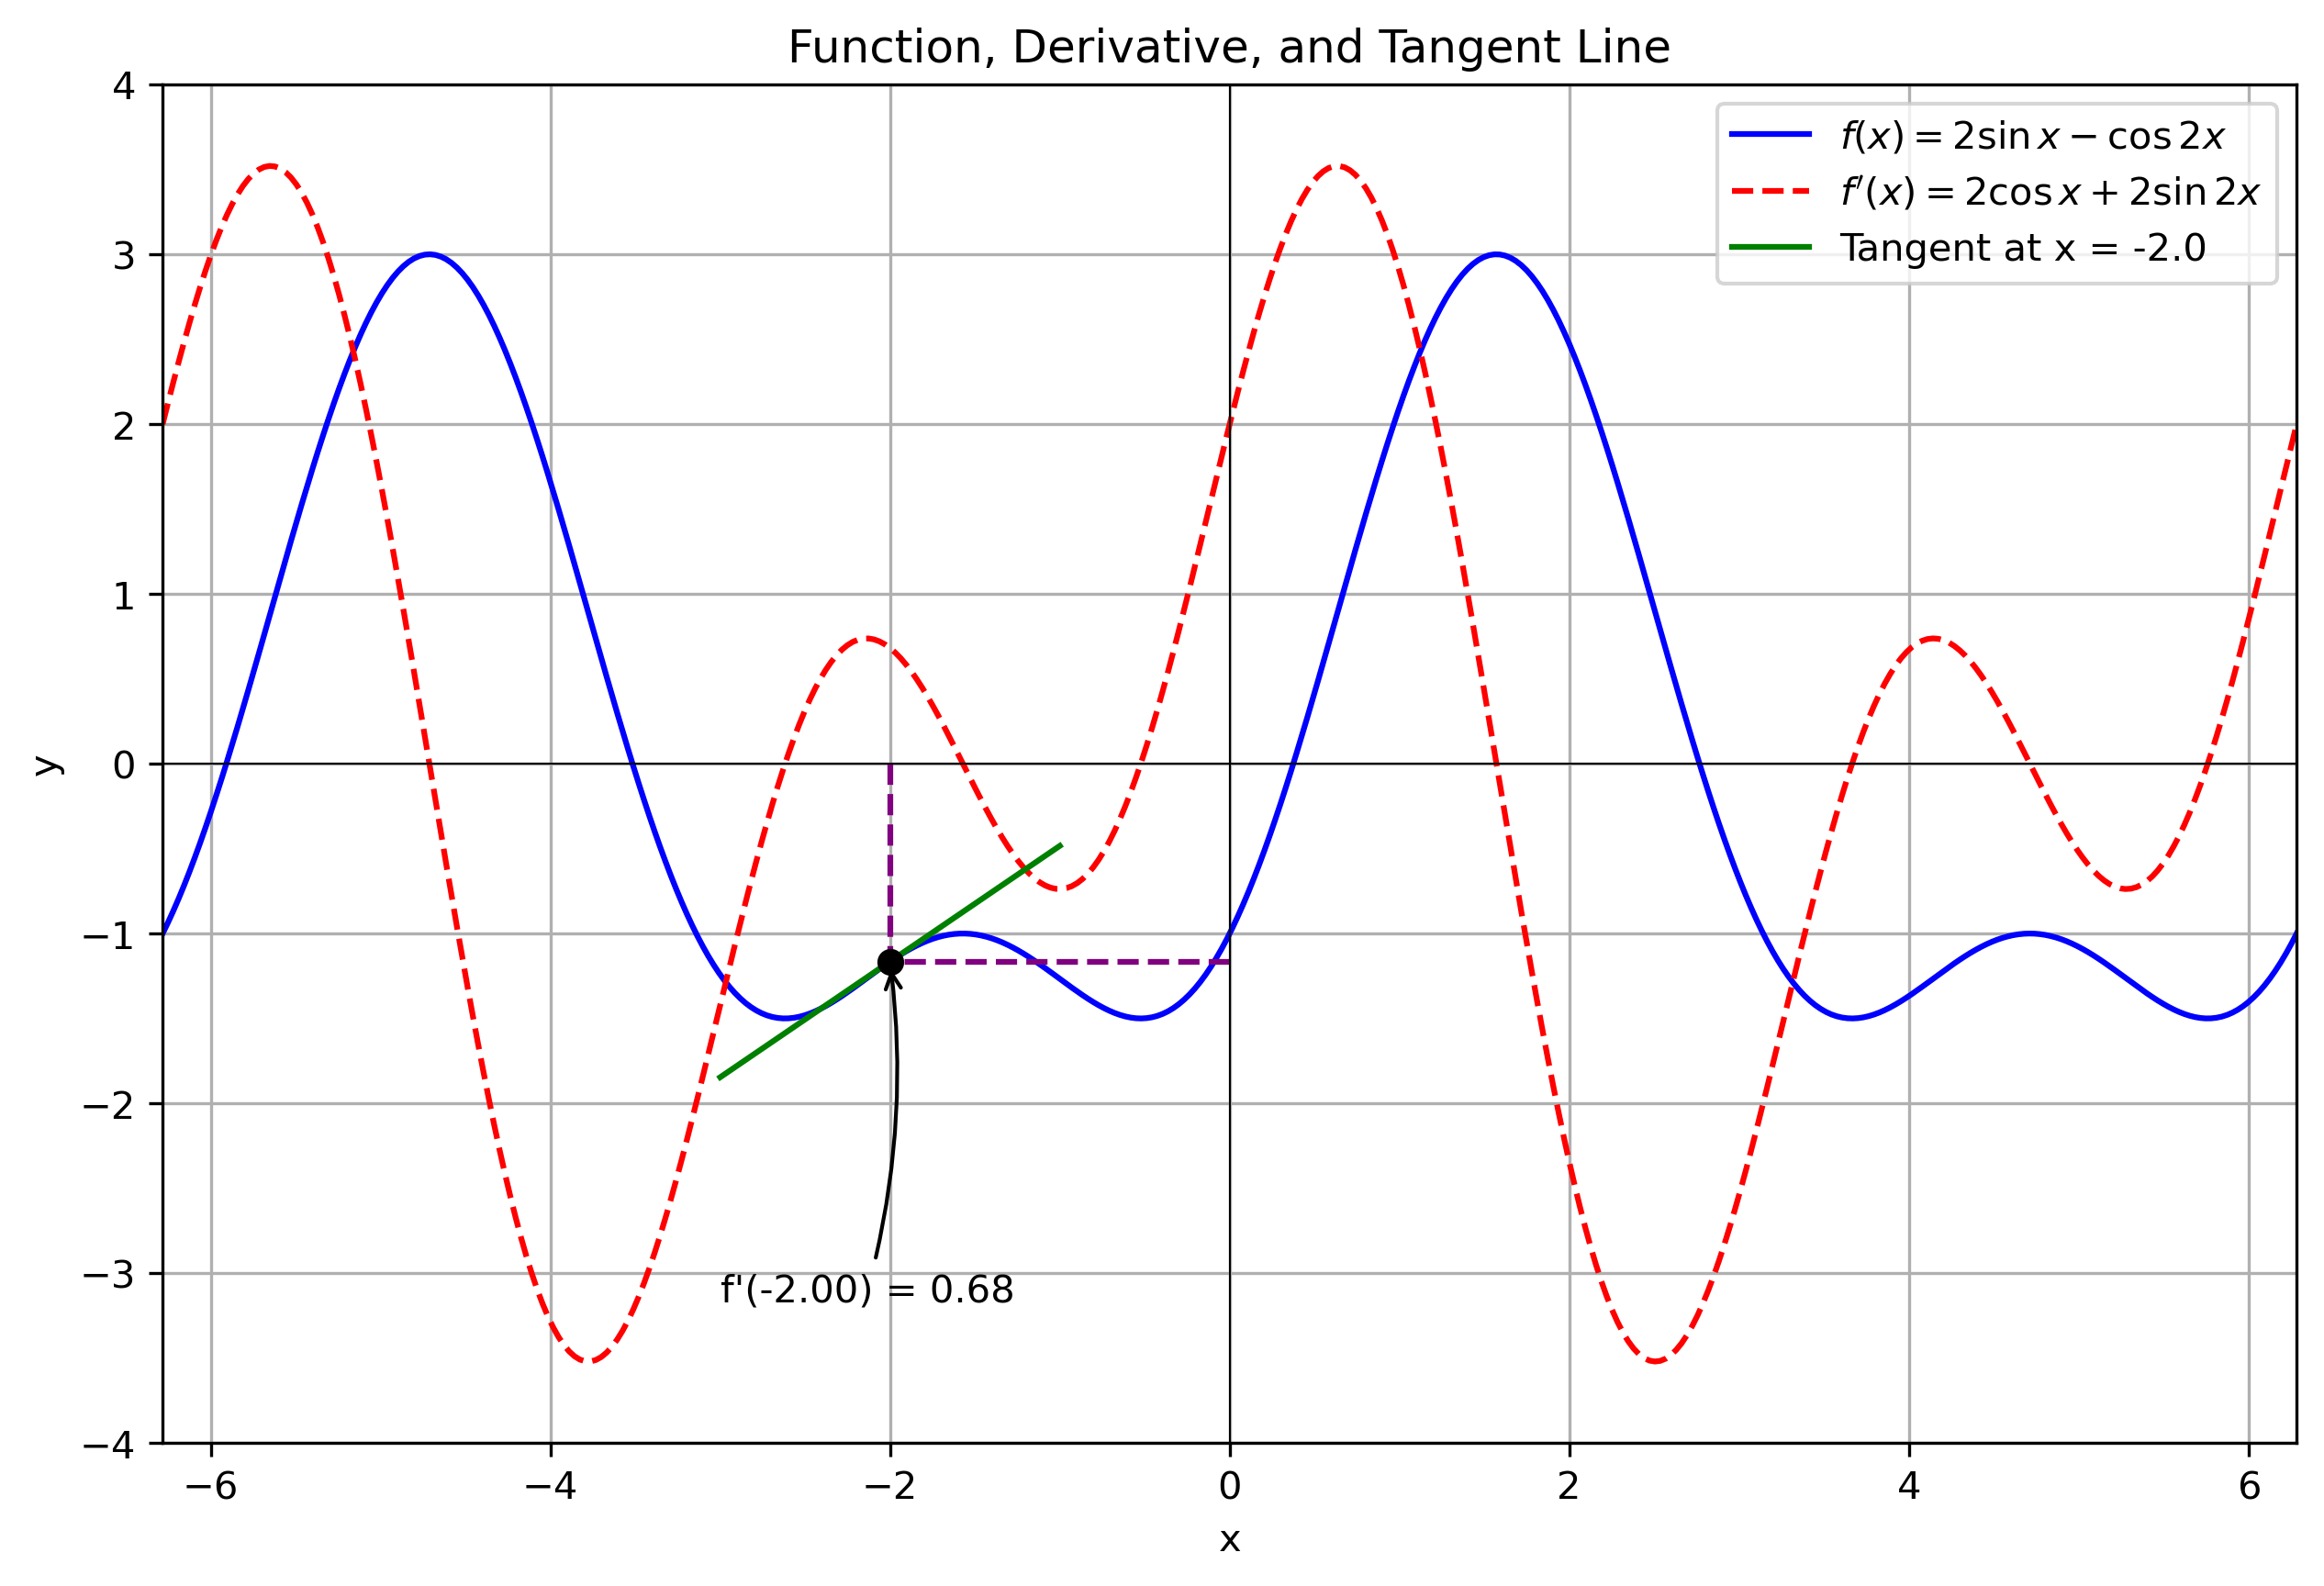

In [3]:
beauty_derivative_plot(-2.0)

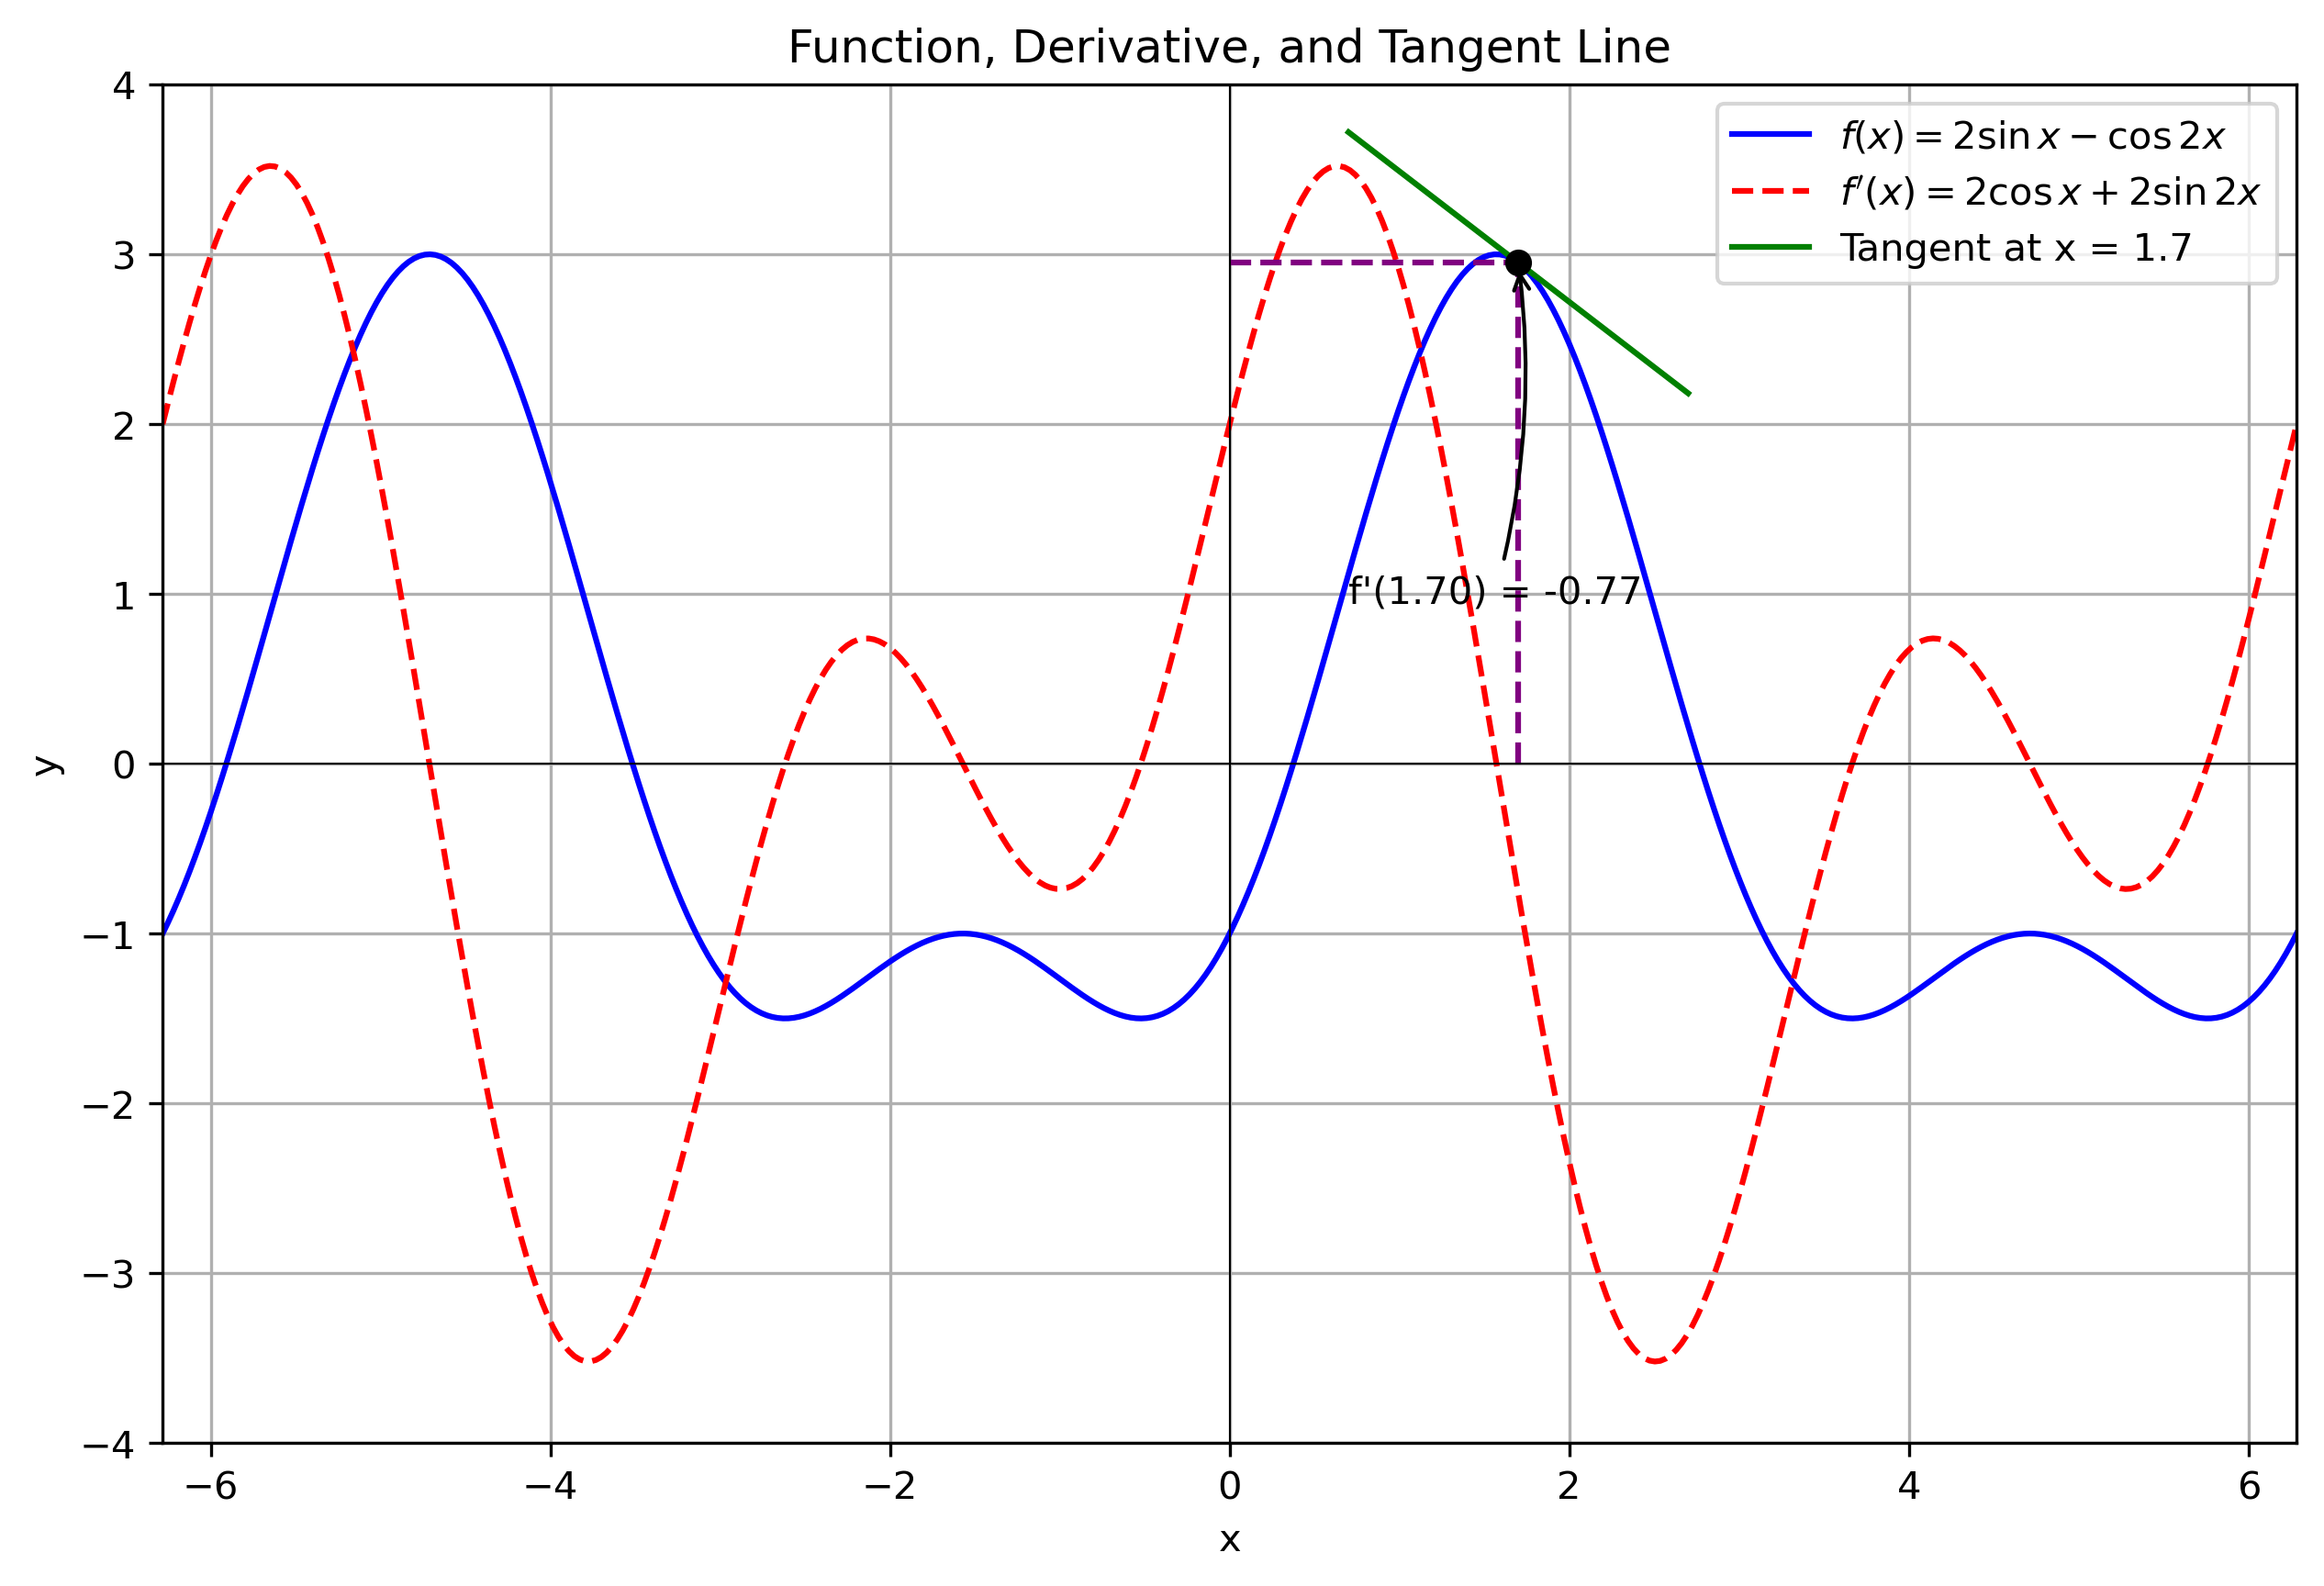

In [4]:
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

Сразу инициализируем необходимое:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные
file_path = "populations.txt"
data = np.loadtxt(file_path, comments="#")

# Разбираем данные
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

plt.rcParams['figure.dpi'] = 300  # Устанавливаем высокое разрешение по умолчанию

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

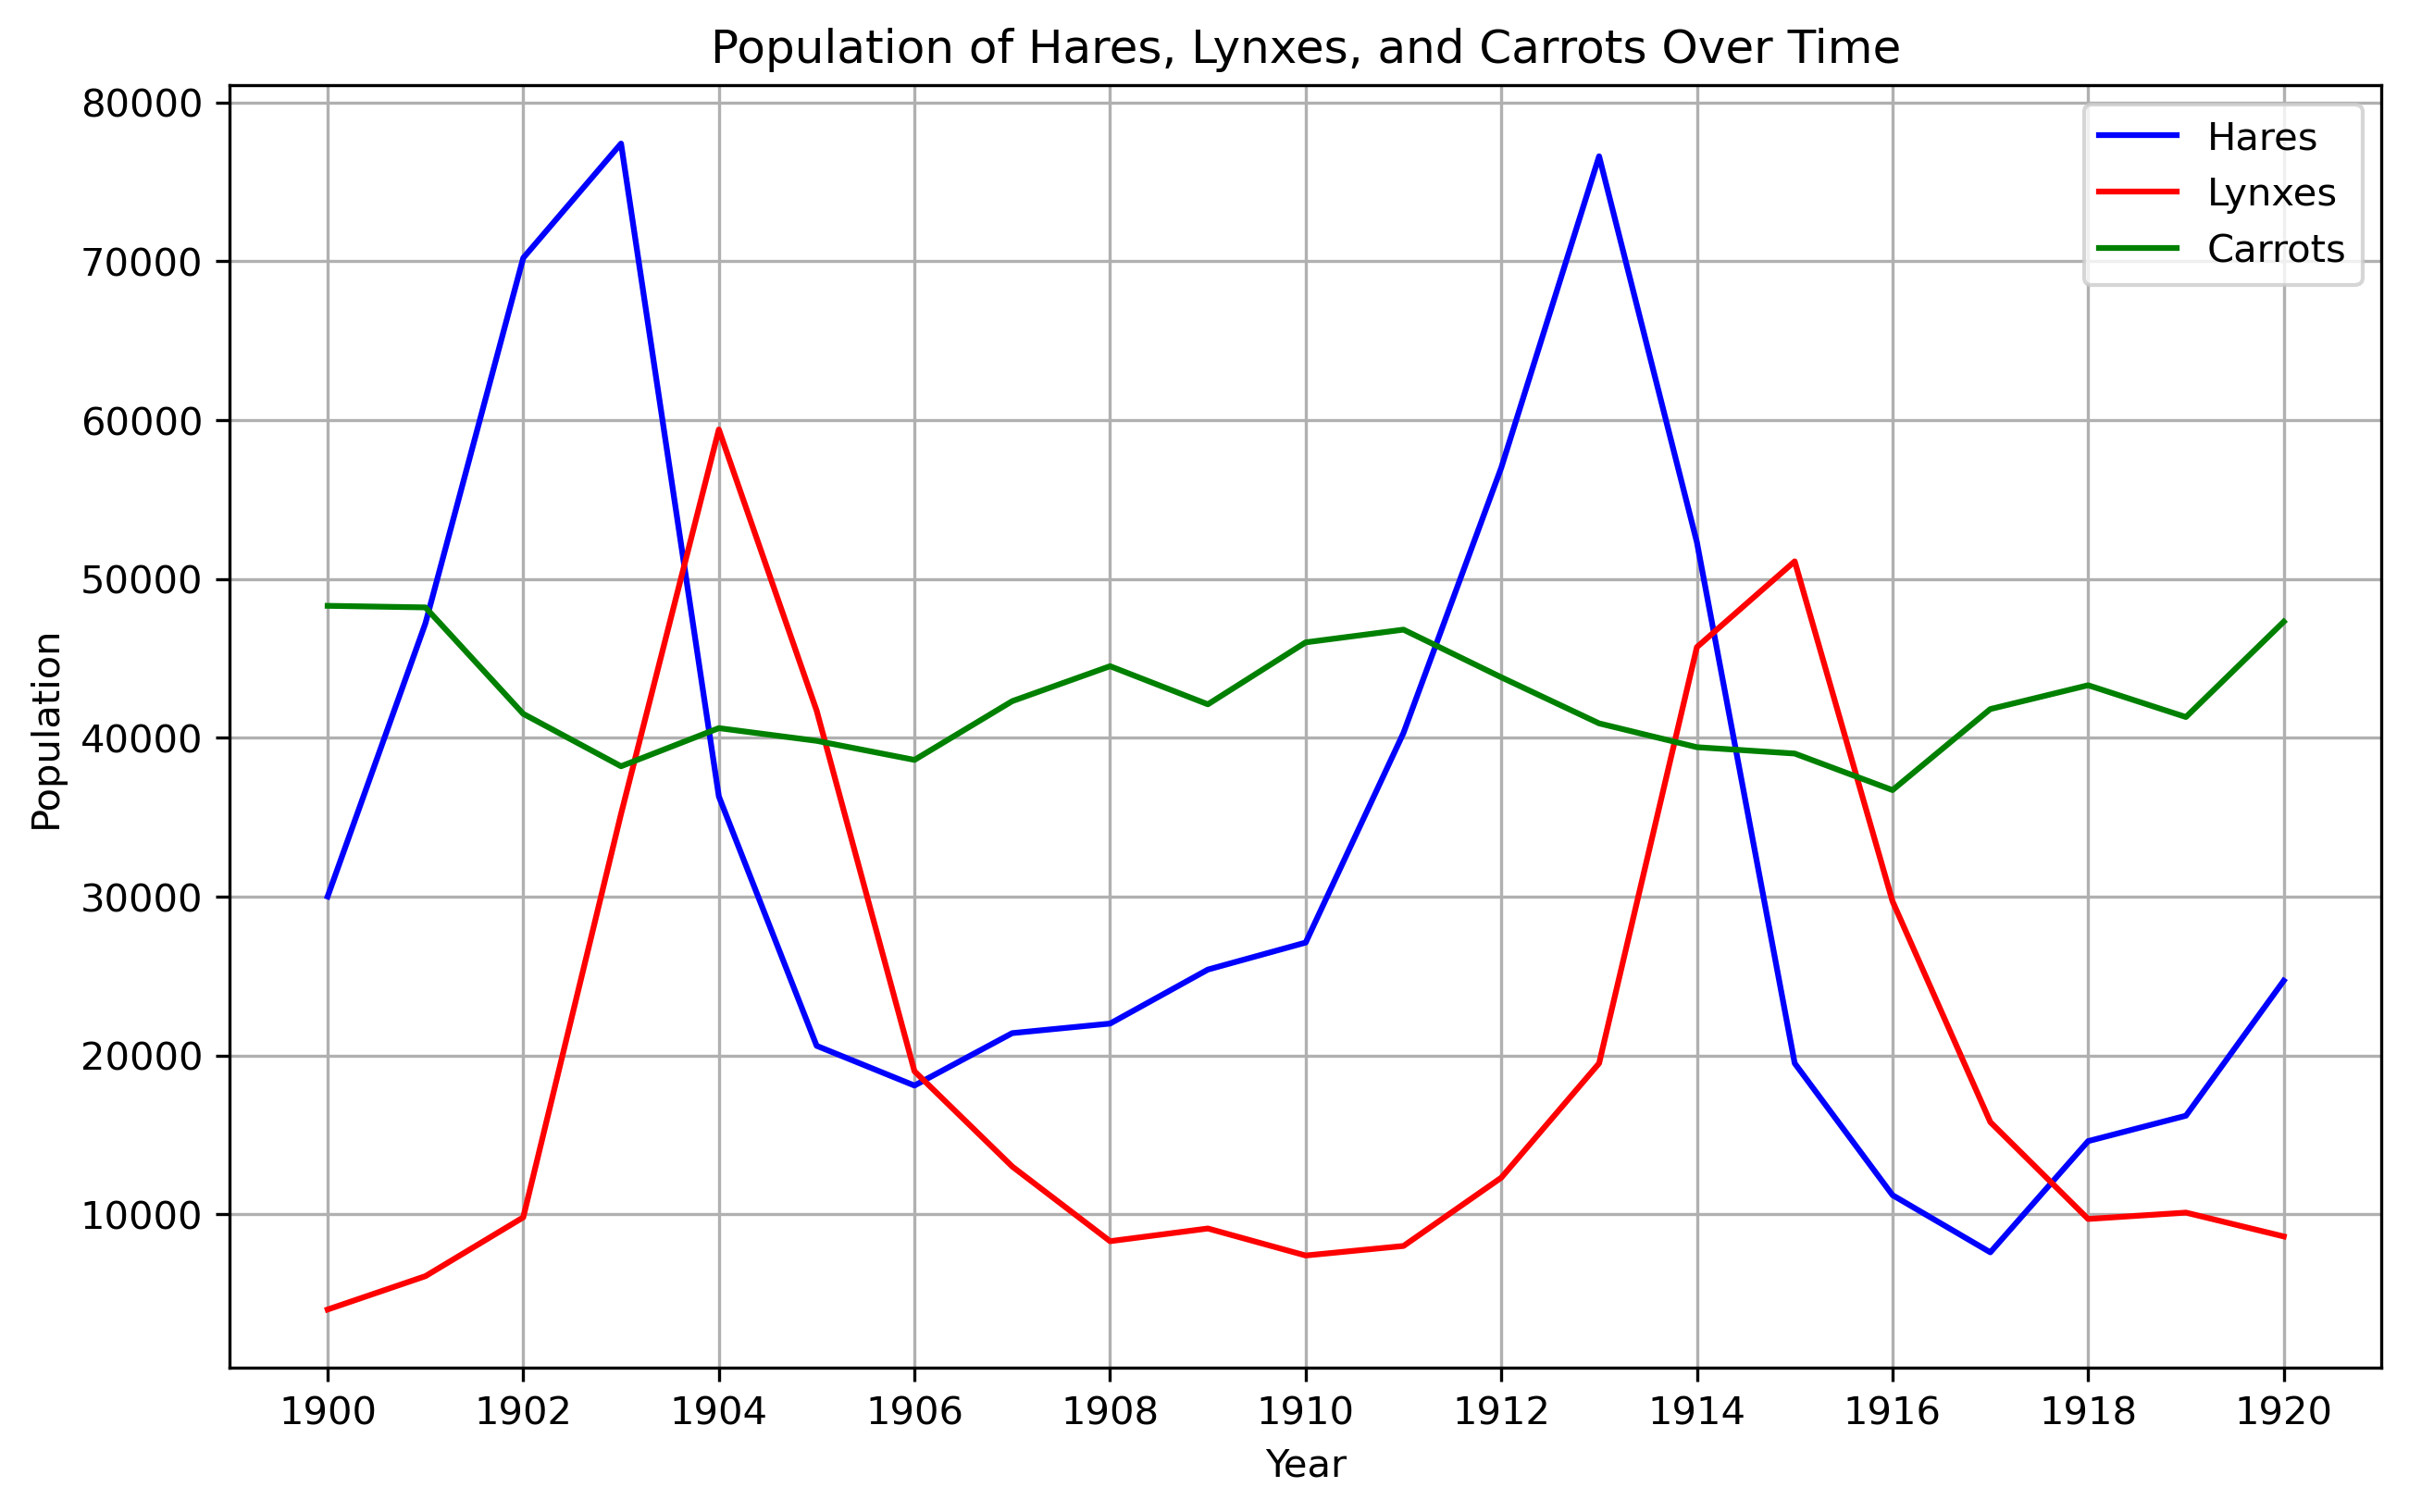

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label="Hares", color='blue')
plt.plot(years, lynxes, label="Lynxes", color='red')
plt.plot(years, carrots, label="Carrots", color='green')
plt.xticks(years[::2])
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population of Hares, Lynxes, and Carrots Over Time")
plt.legend()
plt.grid(True)
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

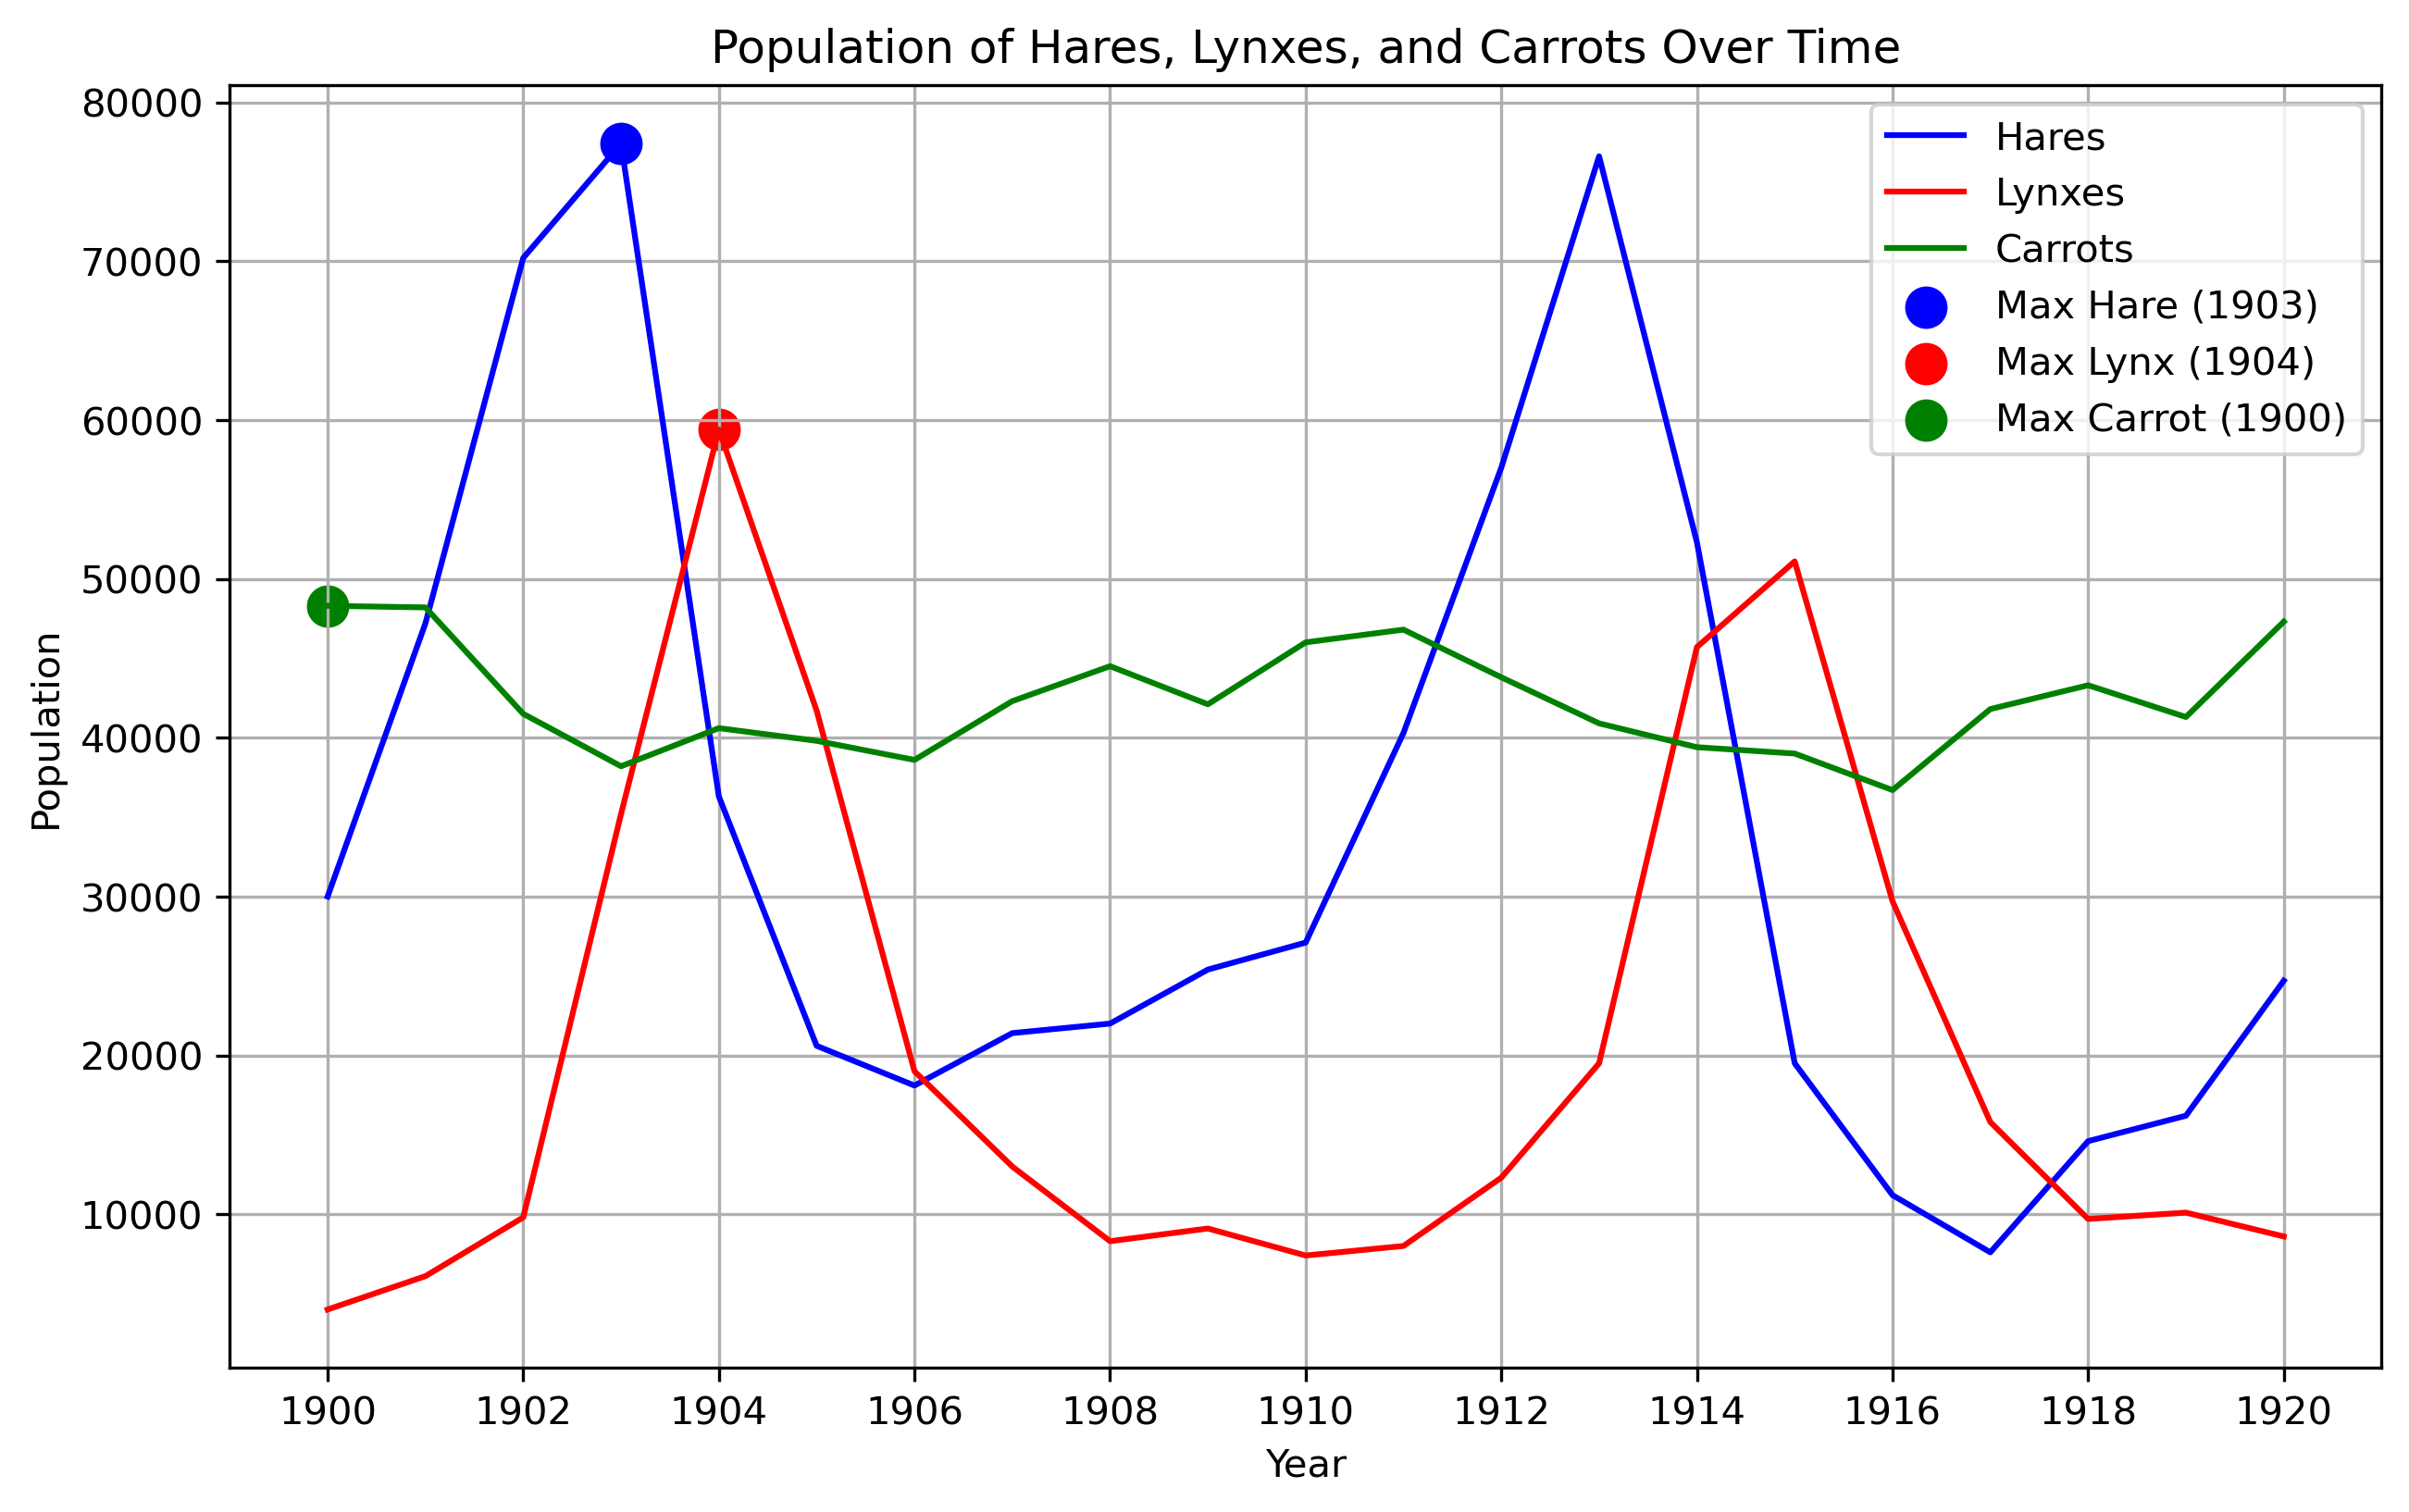

In [7]:
max_hare_year = years[np.argmax(hares)]
max_lynx_year = years[np.argmax(lynxes)]
max_carrot_year = years[np.argmax(carrots)]

plt.figure(figsize=(10, 6))
plt.plot(years, hares, label="Hares", color='blue')
plt.plot(years, lynxes, label="Lynxes", color='red')
plt.plot(years, carrots, label="Carrots", color='green')
plt.scatter(max_hare_year, max(hares), color='blue', marker='o', s=100, label=f'Max Hare ({int(max_hare_year)})')
plt.scatter(max_lynx_year, max(lynxes), color='red', marker='o', s=100, label=f'Max Lynx ({int(max_lynx_year)})')
plt.scatter(max_carrot_year, max(carrots), color='green', marker='o', s=100, label=f'Max Carrot ({int(max_carrot_year)})')
plt.xticks(years[::2])
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population of Hares, Lynxes, and Carrots Over Time")
plt.legend()
plt.grid(True)
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

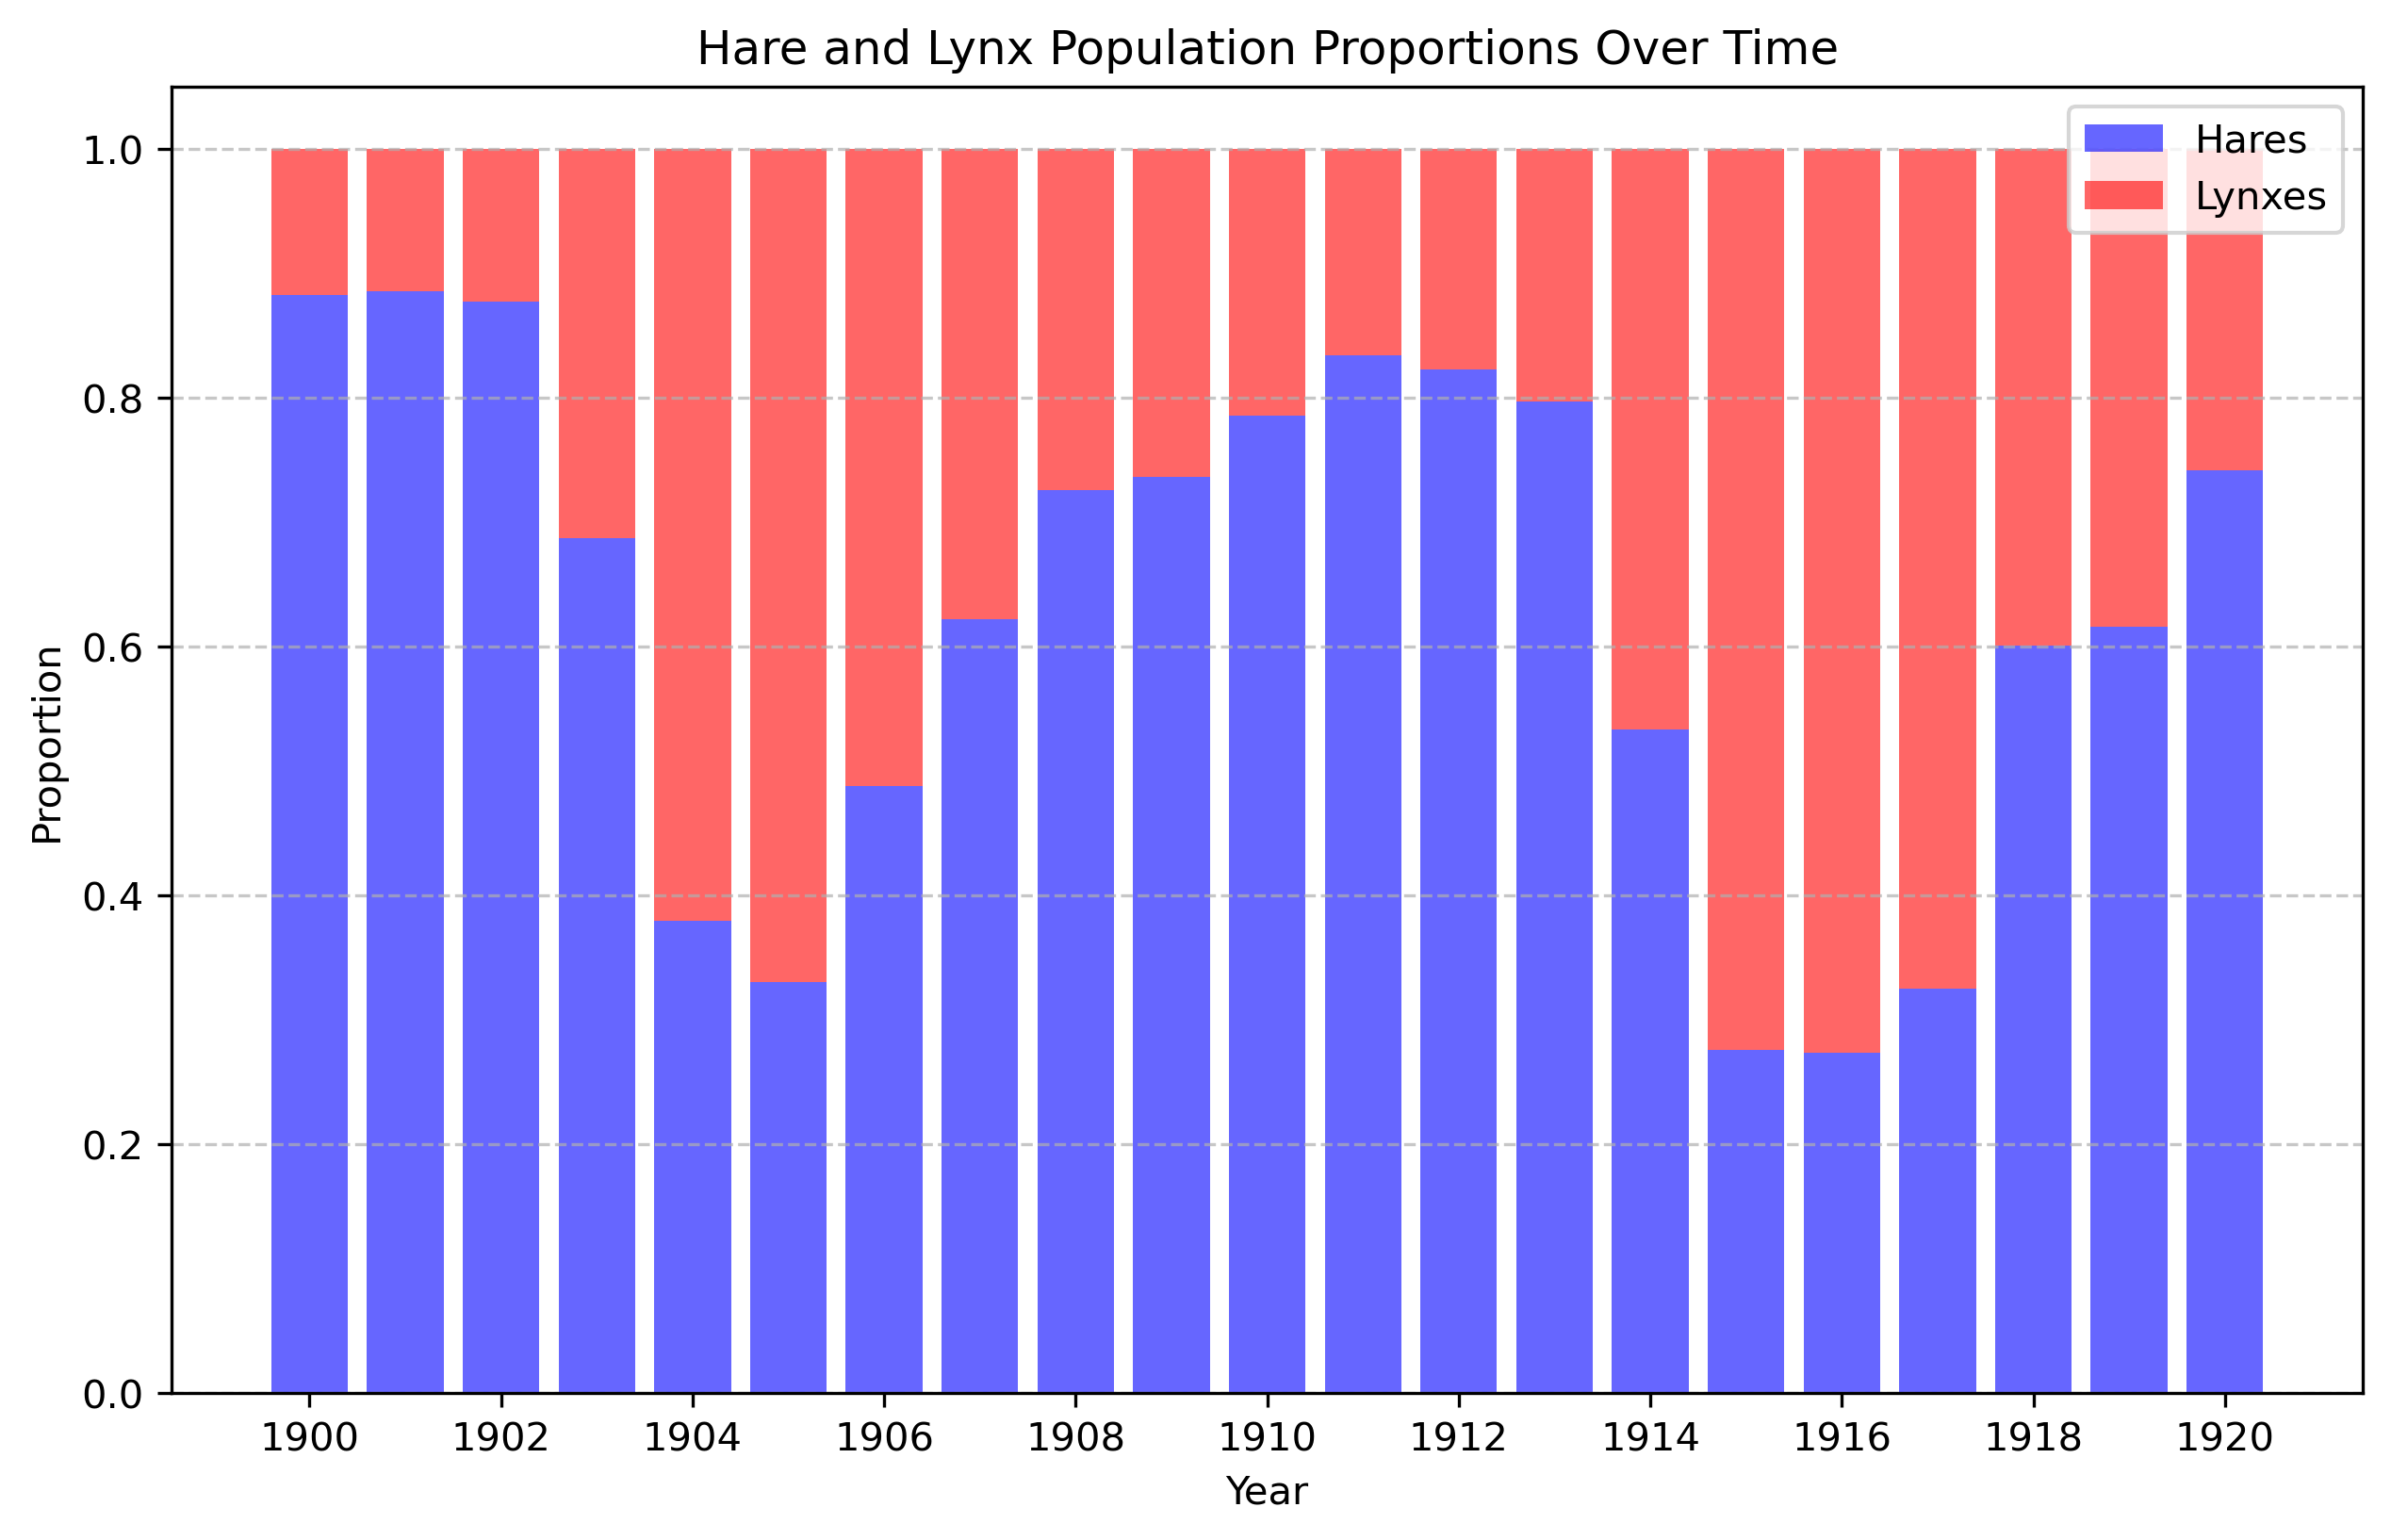

In [8]:
total_hare_lynx = hares + lynxes
hare_ratio = hares / total_hare_lynx
lynx_ratio = lynxes / total_hare_lynx

plt.figure(figsize=(10, 6))
plt.bar(years, hare_ratio, label='Hares', color='blue', alpha=0.6)
plt.bar(years, lynx_ratio, bottom=hare_ratio, label='Lynxes', color='red', alpha=0.6)
plt.xticks(years[::2])
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.title("Hare and Lynx Population Proportions Over Time")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

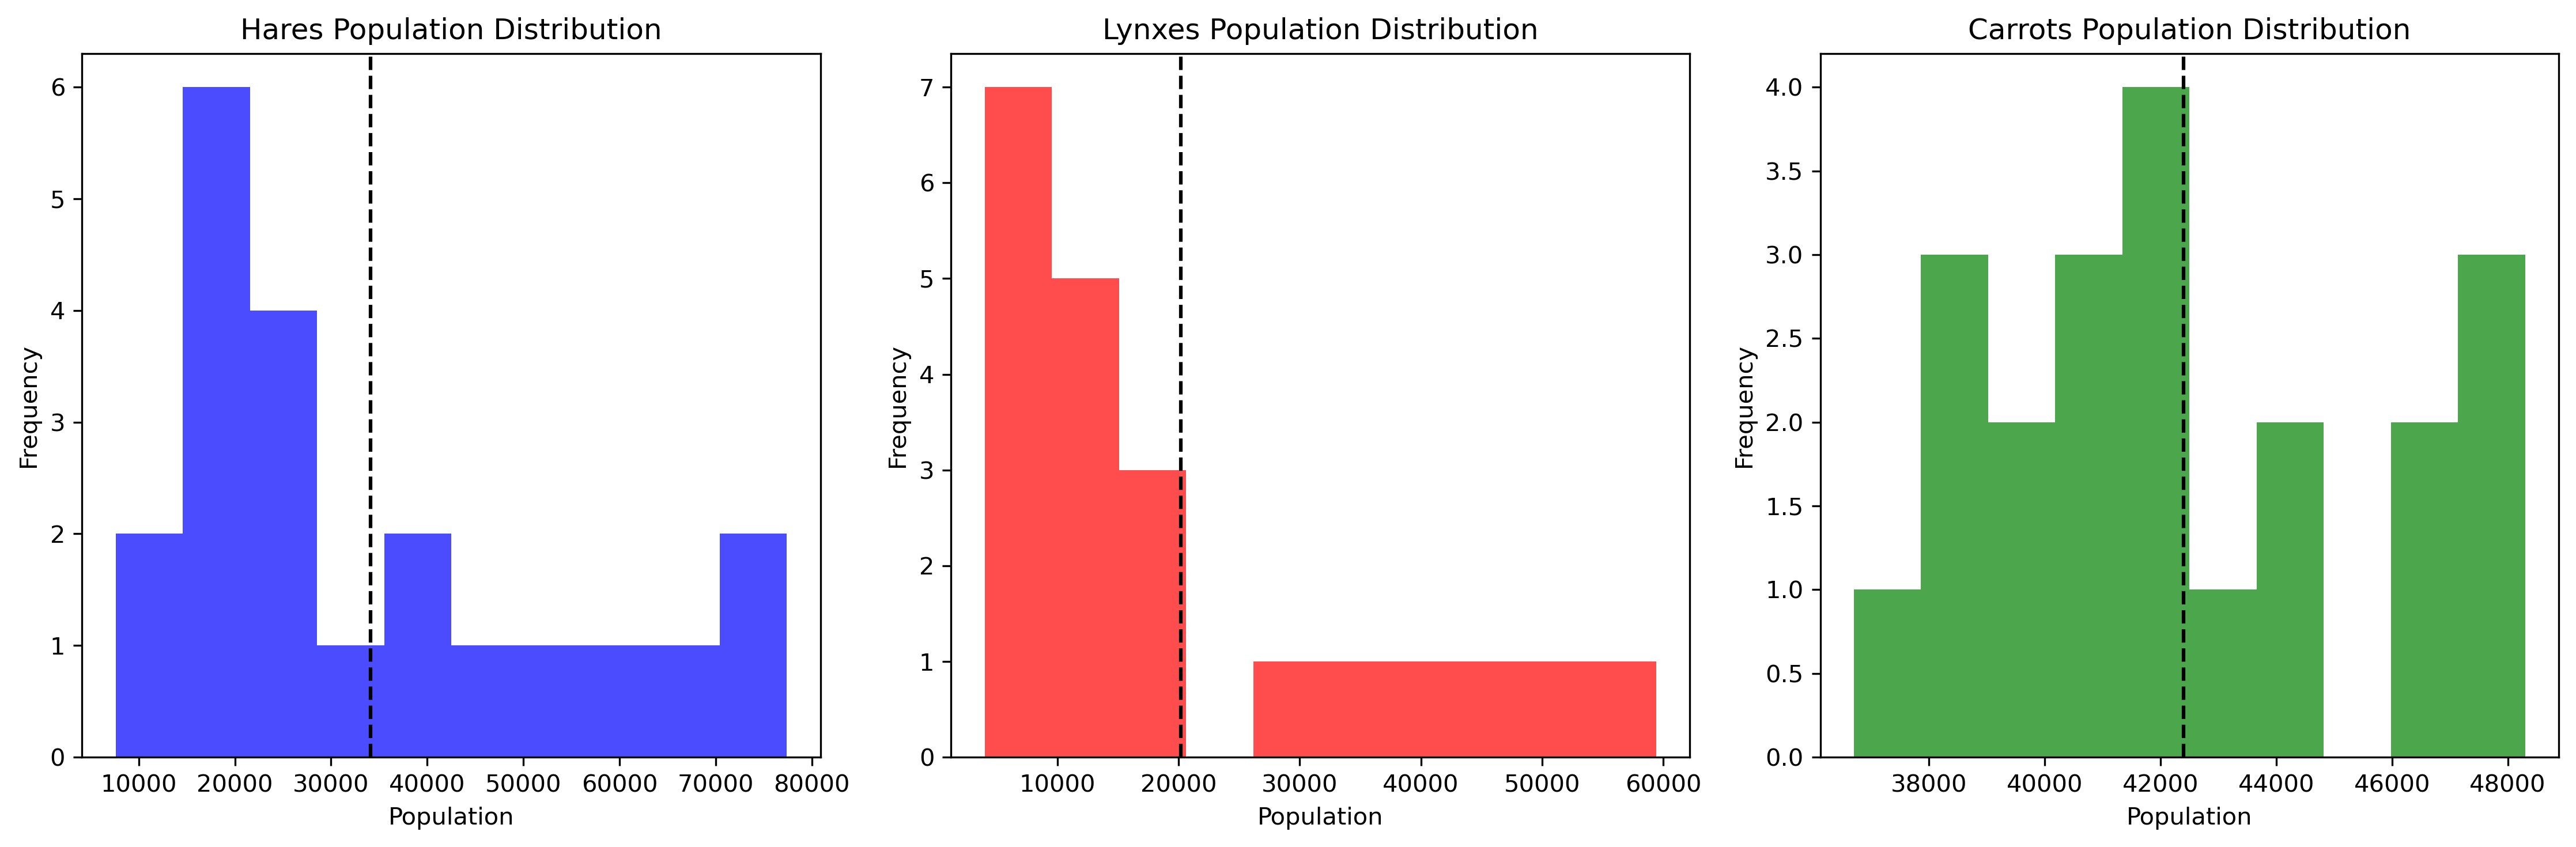

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, population, title, color in zip(axes, [hares, lynxes, carrots], ["Hares", "Lynxes", "Carrots"], ['blue', 'red', 'green']):
    ax.hist(population, color=color, alpha=0.7)
    ax.axvline(np.mean(population), color='black', linestyle='dashed', linewidth=1.5)
    ax.set_title(f"{title} Population Distribution")
    ax.set_xlabel("Population")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


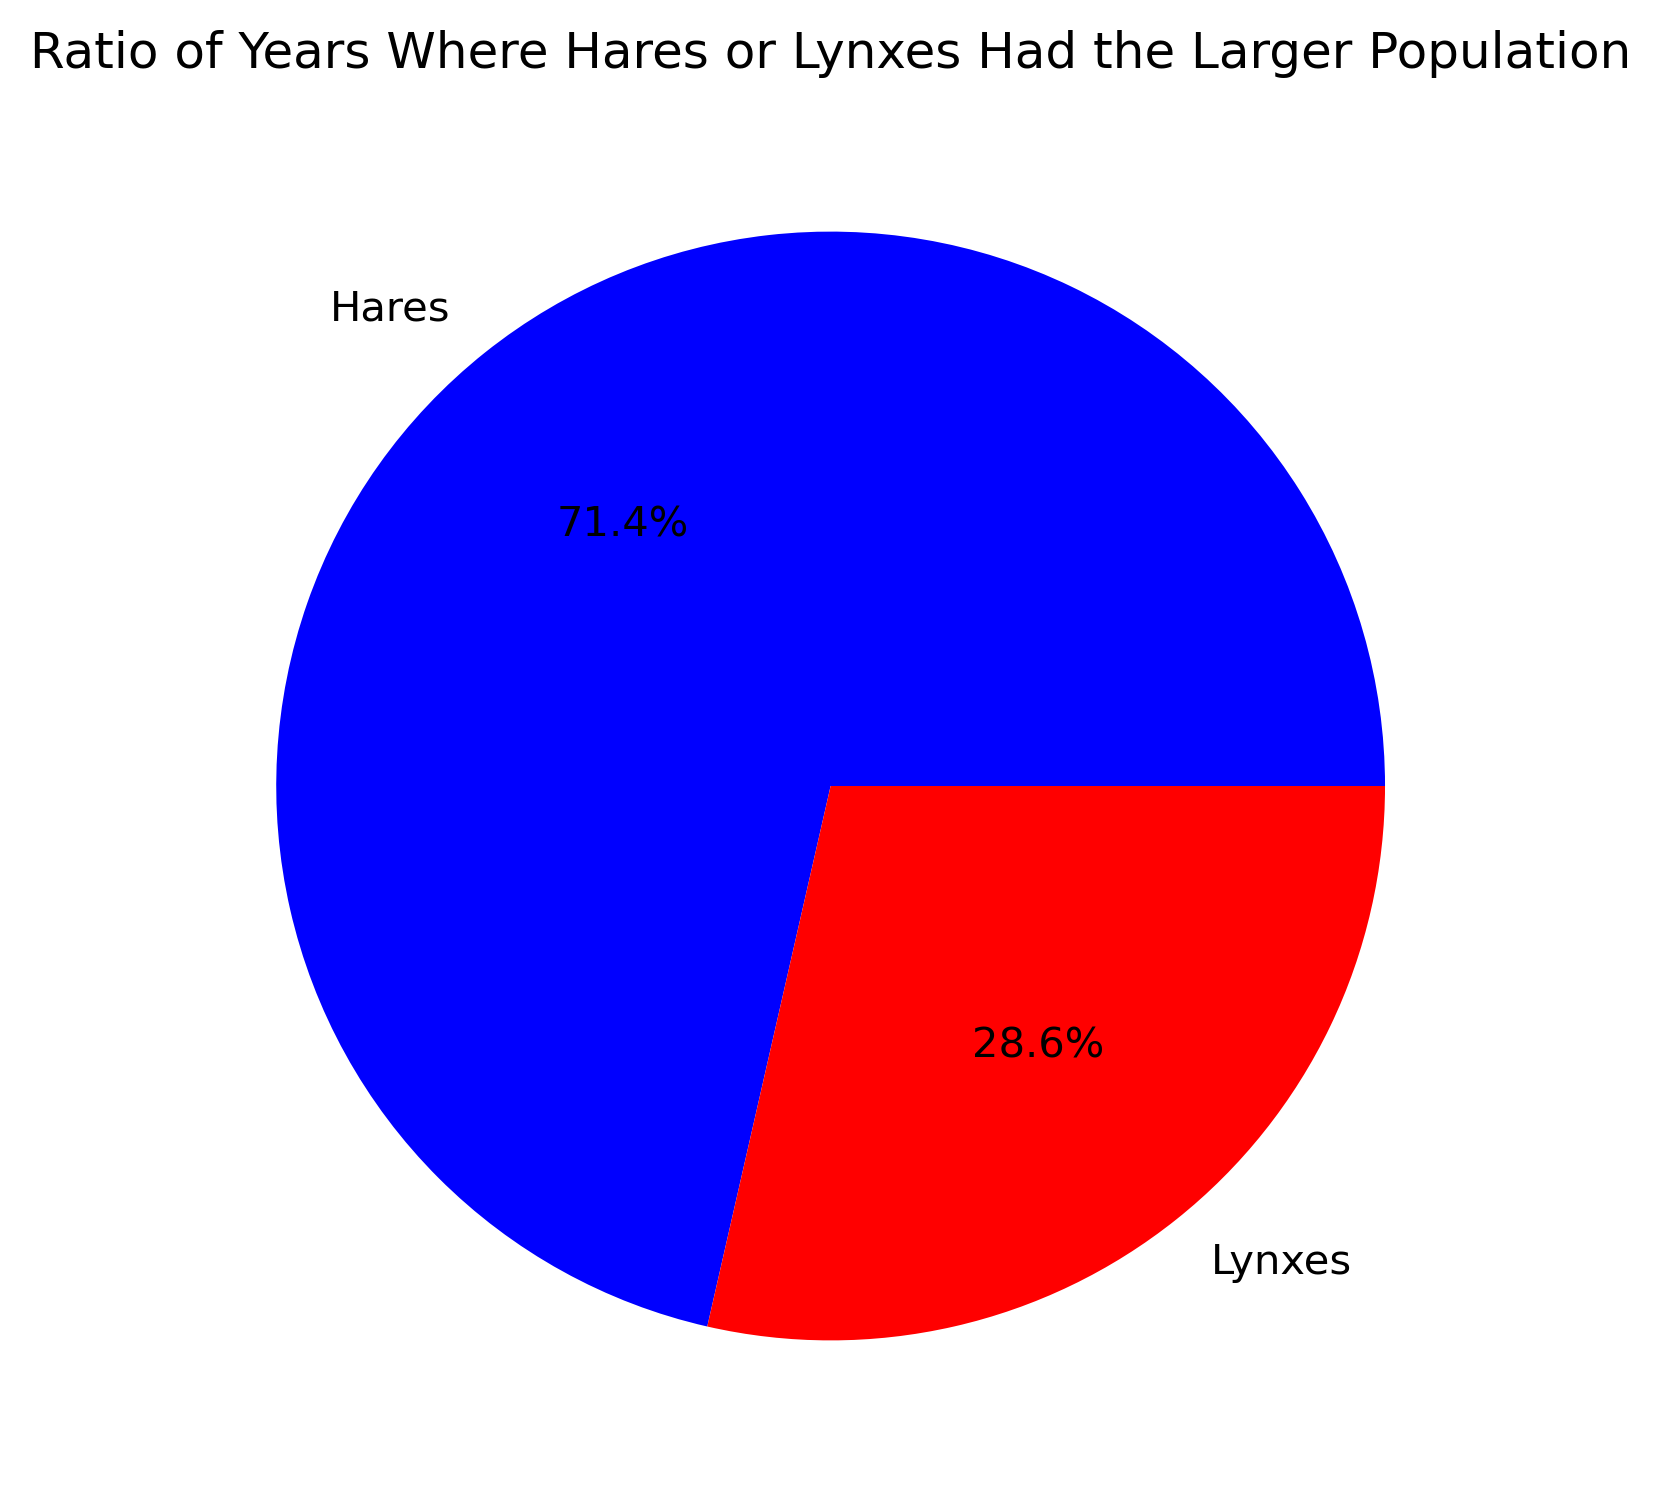

In [10]:
species_dominance = np.where(hares > lynxes, 'H', 'L')
hare_count = np.sum(species_dominance == 'H')
lynx_count = np.sum(species_dominance == 'L')
print(list(species_dominance))

plt.figure(figsize=(6, 6))
plt.pie([hare_count, lynx_count], labels=['Hares', 'Lynxes'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("Ratio of Years Where Hares or Lynxes Had the Larger Population")
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

Корреляция изменений популяции зайцев и рысей: -0.178


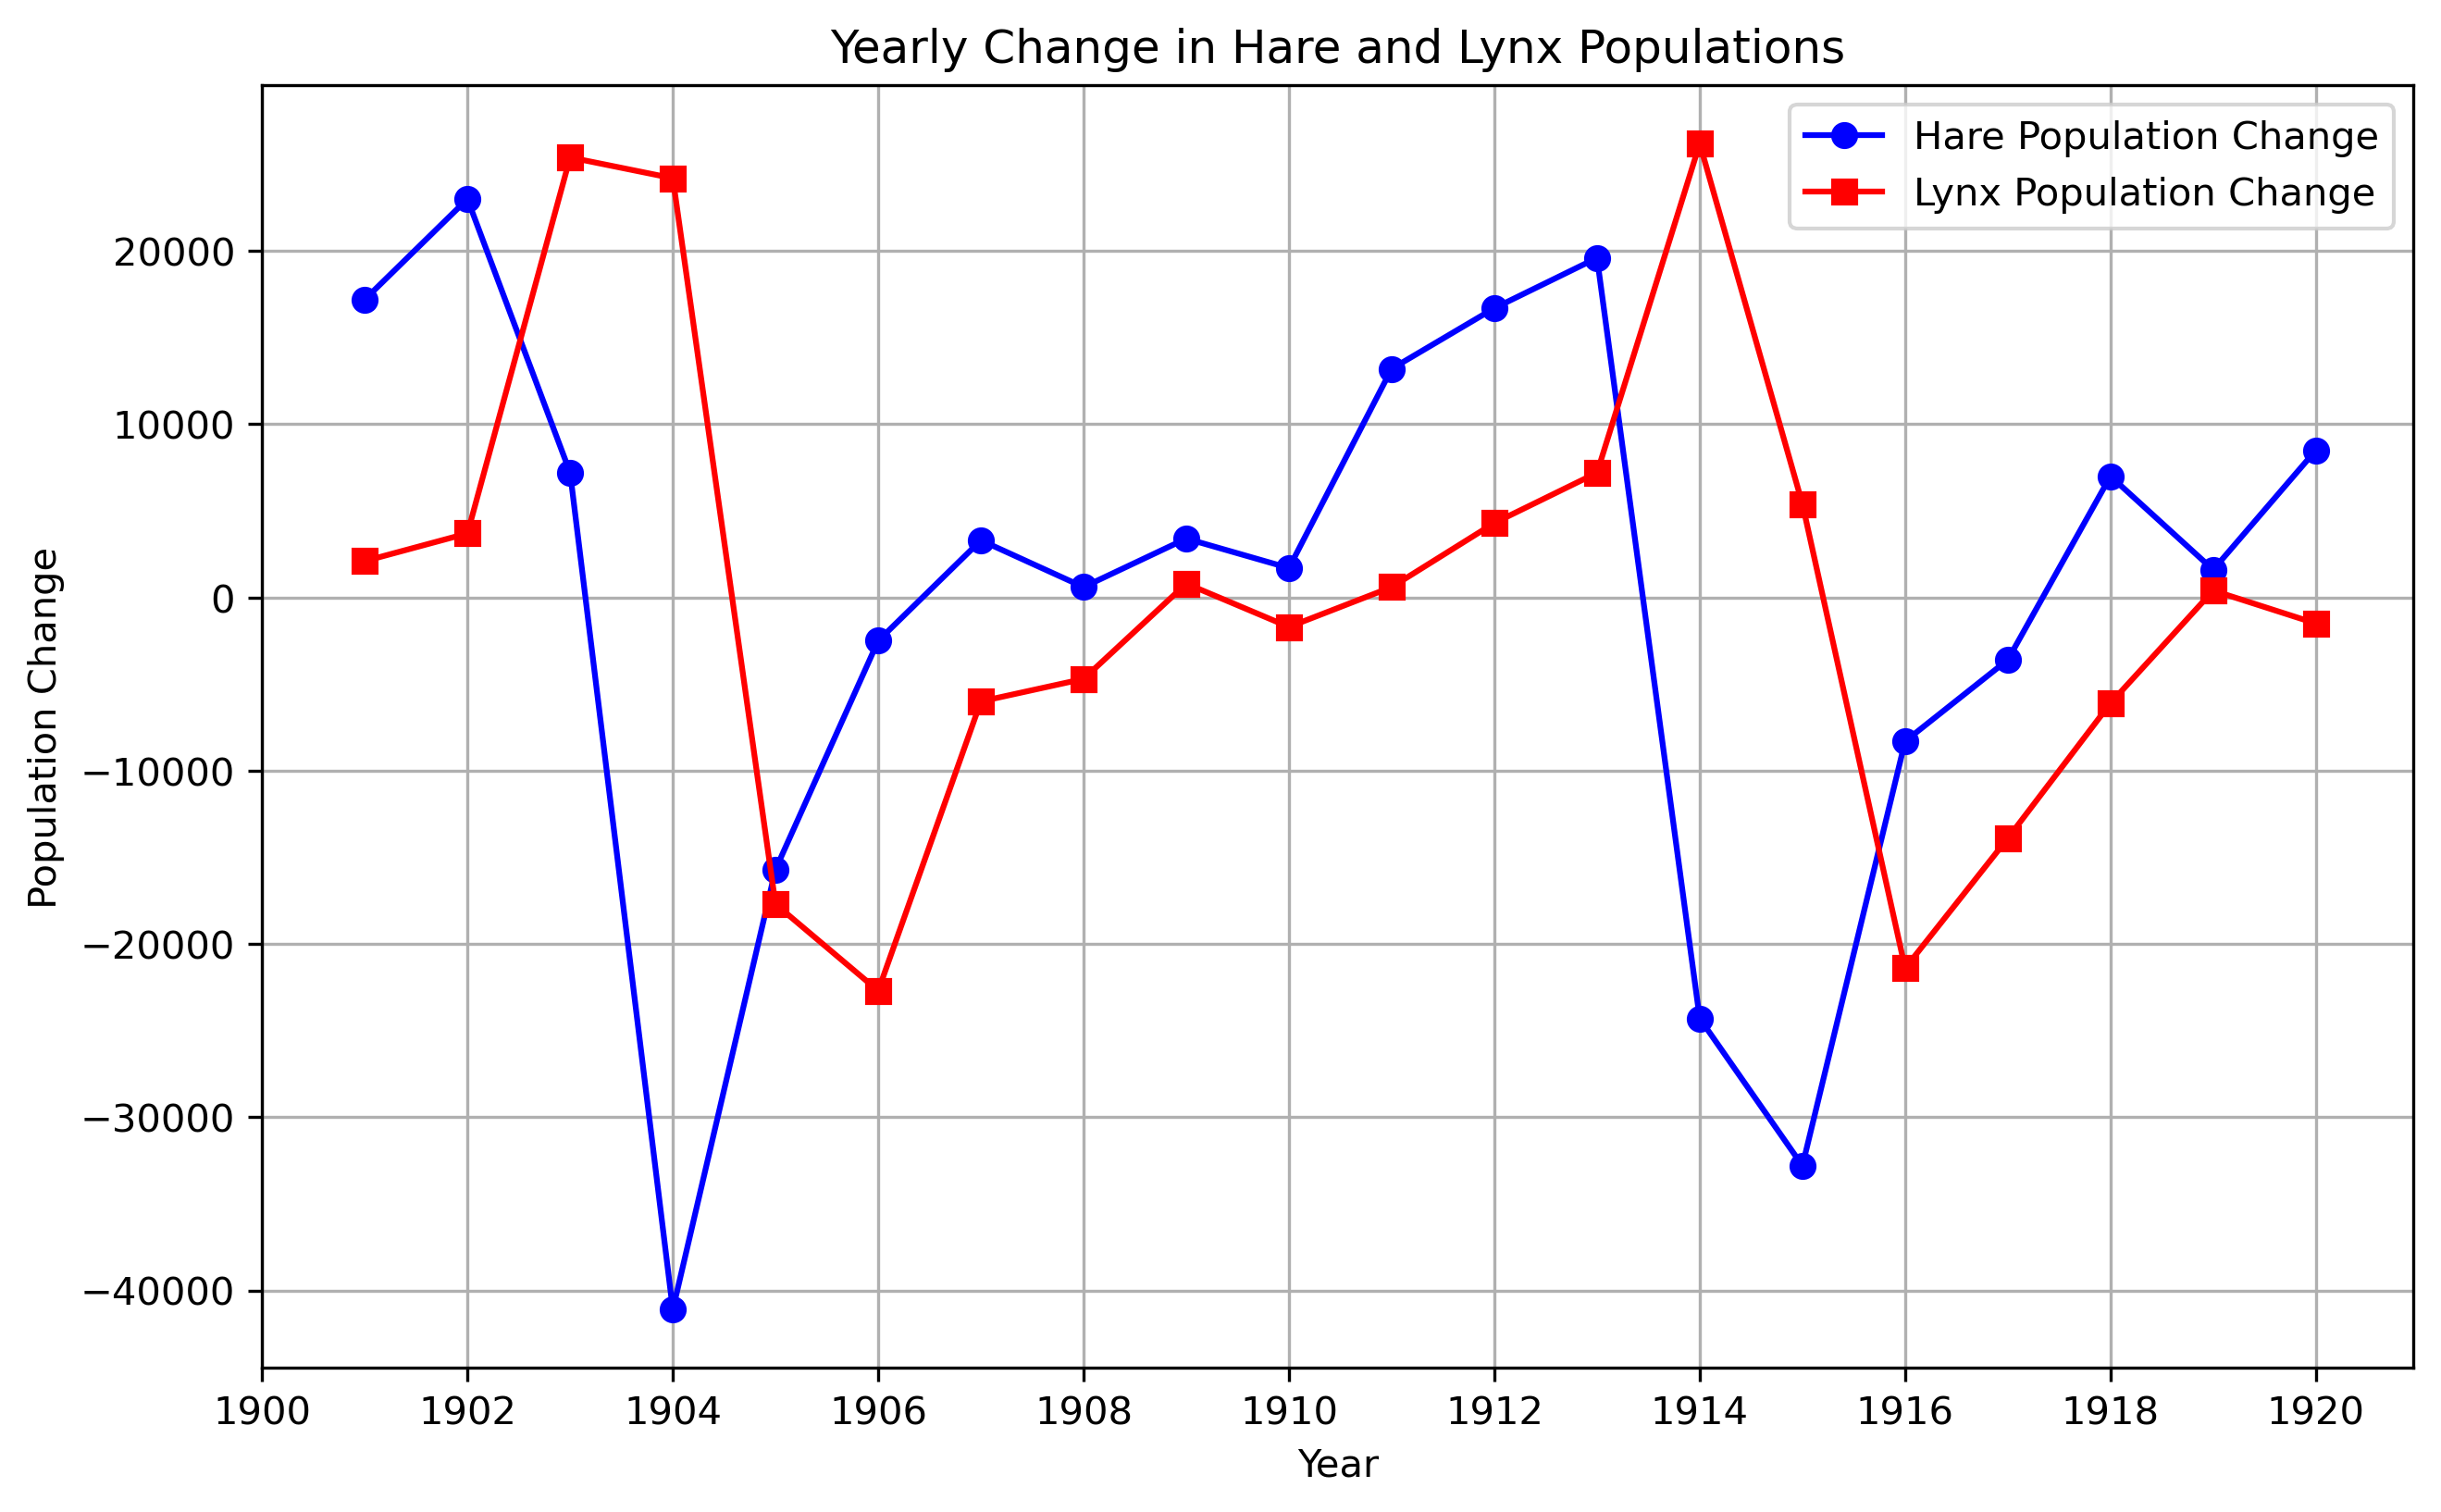

In [11]:
hare_change = np.diff(hares)
lynx_change = np.diff(lynxes)
correlation = np.corrcoef(hare_change, lynx_change)[0, 1]
print(f"Корреляция изменений популяции зайцев и рысей: {correlation:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(years[1:], hare_change, label="Hare Population Change", color='blue', marker='o')
plt.plot(years[1:], lynx_change, label="Lynx Population Change", color='red', marker='s')
plt.xticks(years[::2])
plt.xlabel("Year")
plt.ylabel("Population Change")
plt.title("Yearly Change in Hare and Lynx Populations")
plt.legend()
plt.grid(True)
plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

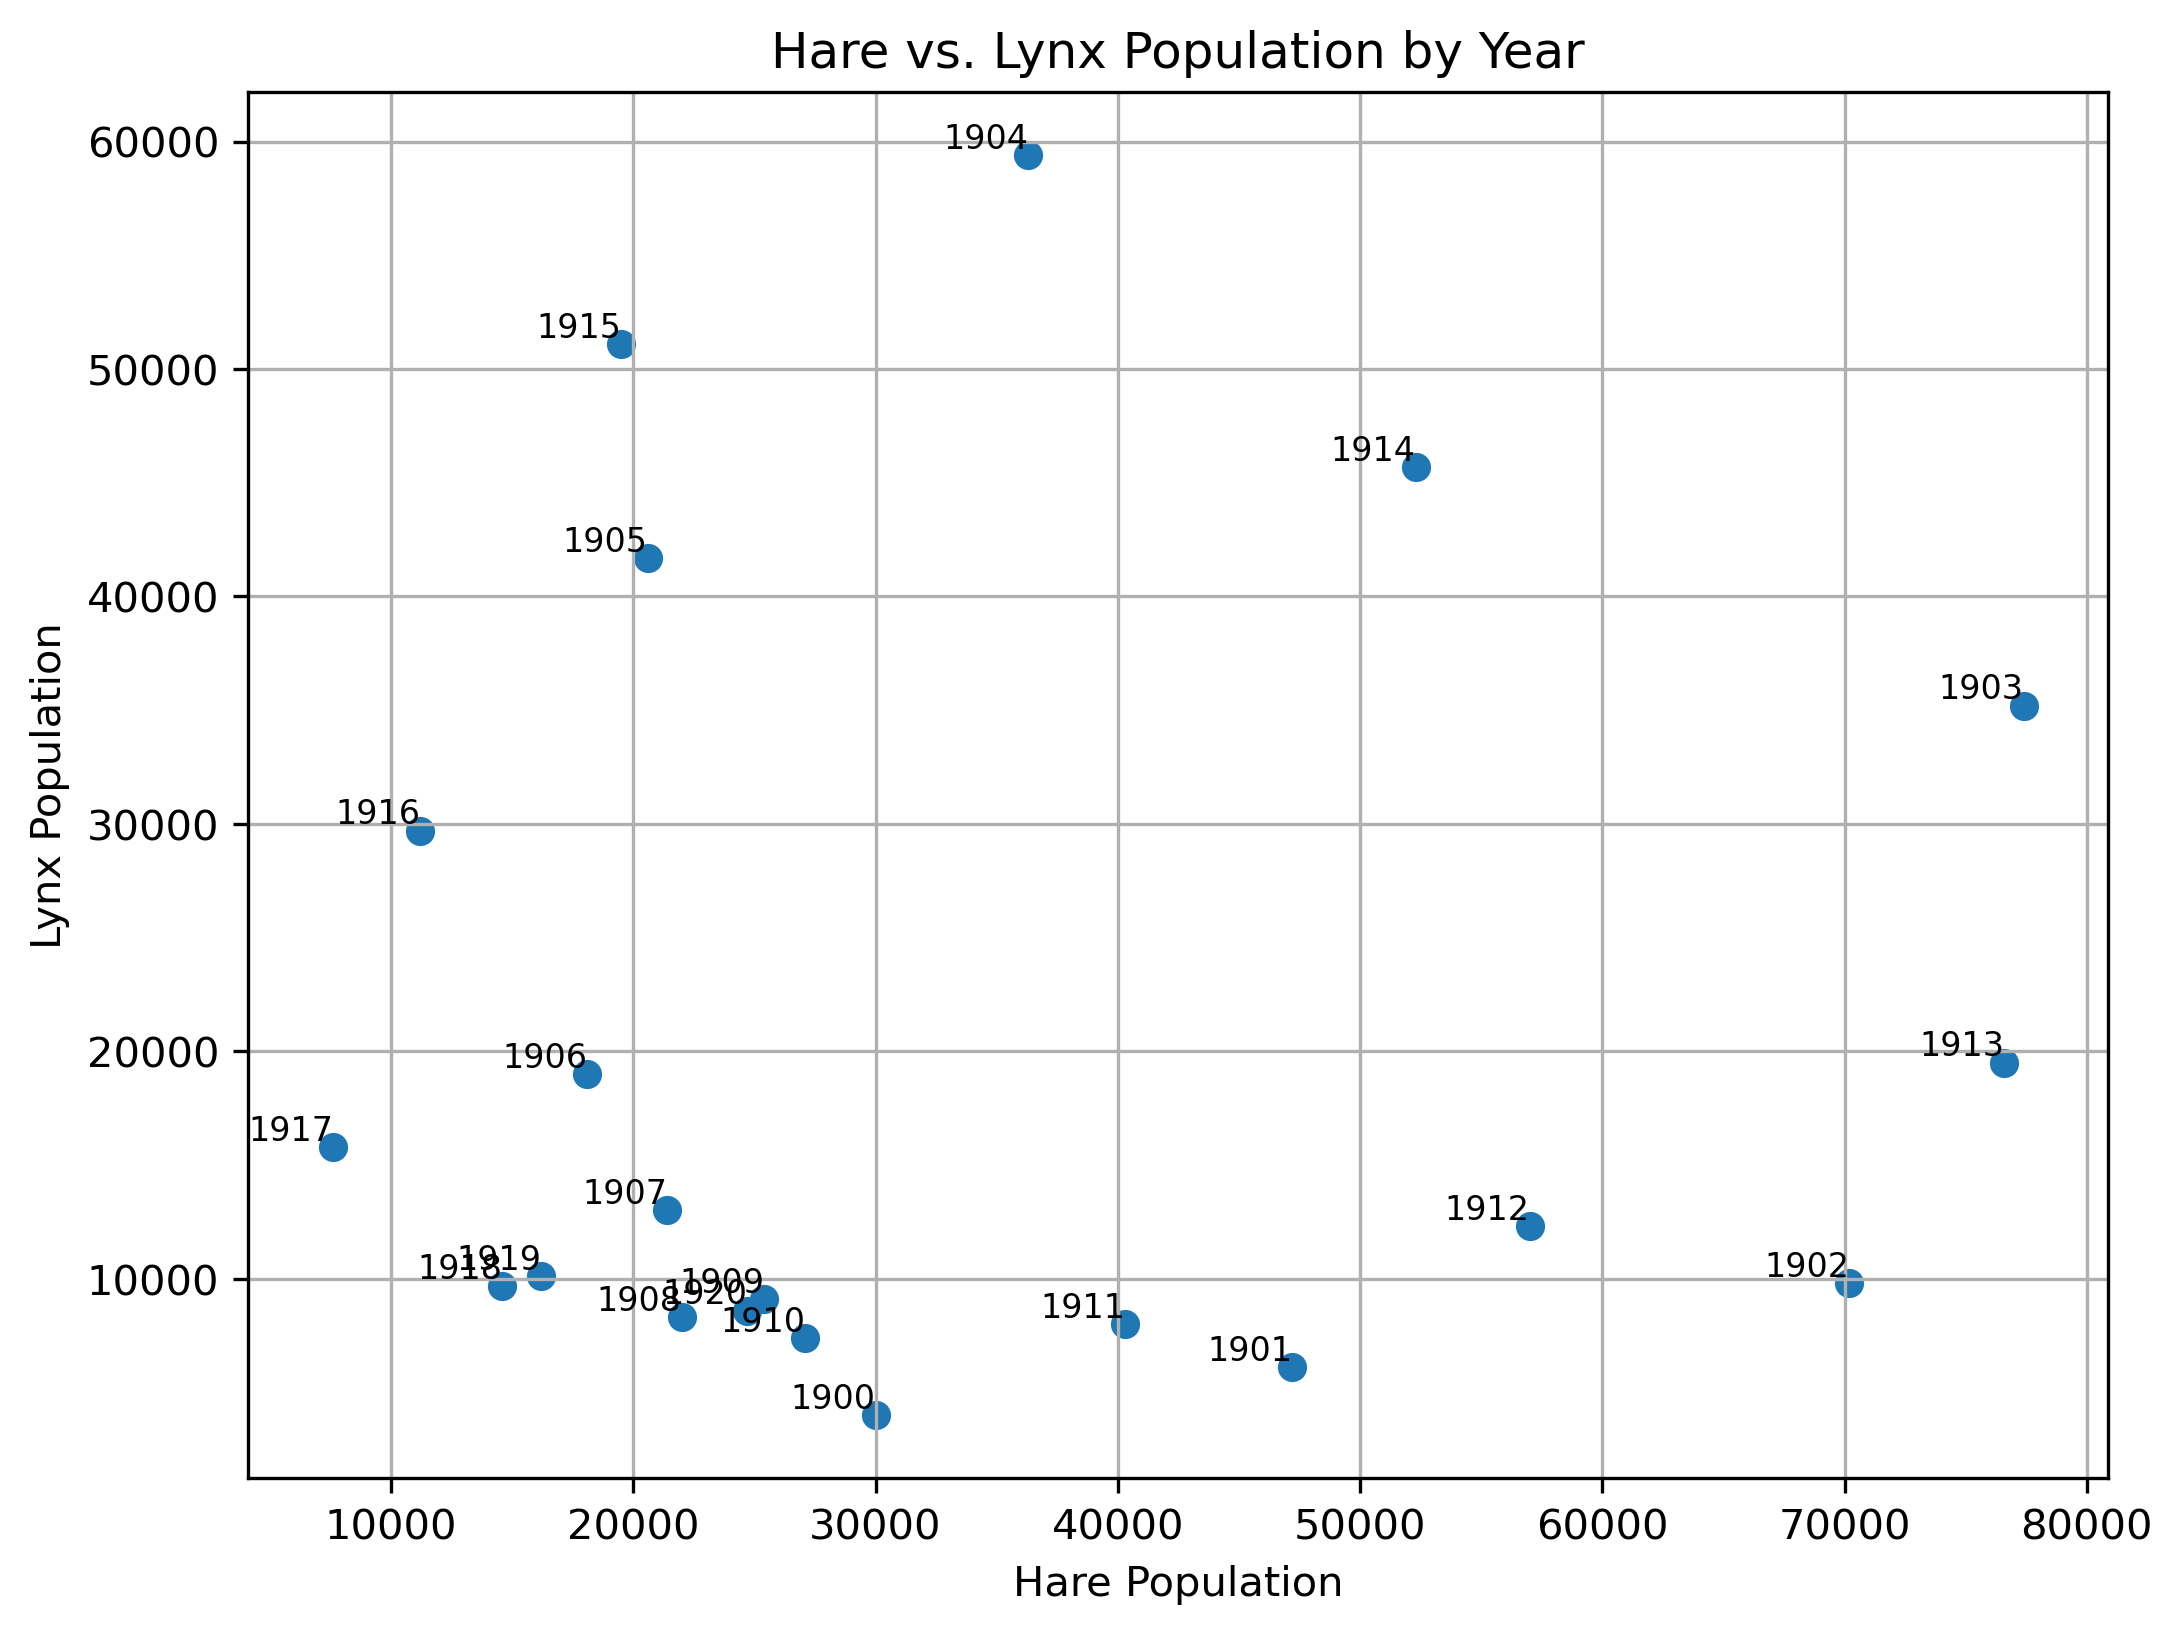

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(hares, lynxes)
list(map(lambda x, y, yr: plt.annotate(str(int(yr)), (x, y), fontsize=8, ha='right', va='bottom'), hares, lynxes, years))
plt.xlabel("Hare Population")
plt.ylabel("Lynx Population")
plt.title("Hare vs. Lynx Population by Year")
plt.grid(True)
plt.show()


- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [13]:
estimated_hare_1920 = np.interp(1920, years[:-1], hares[:-1])
true_hare_1920 = hares[years == 1920][0]
error_ratio = abs(estimated_hare_1920 - true_hare_1920) / true_hare_1920

print(f"Оцененная популяция зайцев в 1920 году: {estimated_hare_1920:.0f}")
print(f"Истинная популяция зайцев в 1920 году: {true_hare_1920:.0f}")
print(f"Отношение ошибки к истинному значению: {error_ratio:.2%}")

Оцененная популяция зайцев в 1920 году: 16200
Истинная популяция зайцев в 1920 году: 24700
Отношение ошибки к истинному значению: 34.41%
